# 학습내용

- EDA 
- Data Report 
- Text analysis

# EDA

<img src="https://fiverr-res.cloudinary.com/images/q_auto,f_auto/gigs/119515873/original/69d50b8a2c493e69dc3900f22665afe2903fd348/do-exploratory-data-analysis-and-feature-engineering-for-you.png">

; **(Exploratory data analysis)**
  - [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis) 


###### Table of contents

   1. <a href="#stat">기술통계량 </a>
   2. <a href="#vis">시각화 </a>
   3. <a href="#report">Data report</a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
font = {'family': 'applegothic',
        'weight': 'bold',
        'size': 31}
mpl.rc('font', **font)
mpl.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv("KR_youtube.csv")
df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
11569,lx8n8z3N9Y8,18.27.01,슬기로운 감빵생활(feat.열려라~야관문~~마셔라~야아관!!),. 강력남,22,2018-01-26T07:08:07.000Z,"해롱이|""유대위""|""민철""|""제혁""|""문래동""|""카이스트""|""야관""|""야관문""",21637,300,2,39,https://i.ytimg.com/vi/lx8n8z3N9Y8/default.jpg,True,True,True,ㅋㅋ 야관문 드셔보신분 있으신가요?ㅋㅋ\n밤에 문이 열린다니 신기하네요 \n다른세상...,People & Blogs
7001,GLT--PFkw50,17.26.12,블리치 너무 귀여운 네르와의 첫 만남 / Bleach,AniRem,1,2017-12-24T08:59:34.000Z,"블리치|""블리치 명장면""|""블리치 op""|""블리치 만해""|""블리치 극장판""|""블리치...",179708,614,37,256,https://i.ytimg.com/vi/GLT--PFkw50/default.jpg,True,True,True,너무 귀여운 네르\n말도 오지게 빠르고 대사도 많아서 편집이 많이 되었습니다.\n이...,Film & Animation
17925,eQU-R5dqP-Q,18.07.03,BLACKPINK - ‘블핑하우스 (BLACKPINK HOUSE)’ EP.9-3,BLACKPINK,22,2018-03-03T12:00:02.000Z,"BLACKPINK|""블랙핑크""|""블핑""|""제니""|""리사""|""로제""|""지수""|""JEN...",499189,19453,122,1102,https://i.ytimg.com/vi/eQU-R5dqP-Q/default.jpg,True,True,True,‘블핑하우스 (BLACKPINK HOUSE)’ EP.9ㅤㅤ ㅤㅤ ㅤㅤ \n\n[On...,People & Blogs


### 기술 통계량
<p id="stat">

#### 데이터를 우리는 어떻게 바라 볼 것인가. 


  **확률적 데이터**
  
   : 항상 같은 값이 나오는 데이터를 결정론적 데이터(deterministic data), 예측할 수 없는 값이 나오는 데이터를 확률적 데이터(random data, probabilistic data, stochastic data)라고 한다. 우리가 다루는 대부분의 데이터는 확률적 데이터이다.

**데이터가 확률적이 되는 이유는 ?**

  1. 넓은 범위의 대상 
  2. 측정 시 오차 
  
**우리가 할 수 있는 것**

  : 상황에 따라 우리가 가지고 있는 지식이 있다. 이 지식을 정량적으로 표현 하는 것은 데이터분석으로 해야 하는 중요한 일 중 하나이다.

In [3]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,33023.000000,3.302300e+04,3.302300e+04,3.302300e+04,3.302300e+04
mean,21.151985,4.206037e+05,1.181485e+04,5.332303e+02,1.991526e+03
std,6.669264,2.427884e+06,1.155629e+05,1.398592e+04,2.167840e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.774100e+04,4.110000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.111940e+05,1.386000e+03,6.500000e+01,3.440000e+02
75%,25.000000,2.786070e+05,3.691000e+03,1.740000e+02,9.250000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


#### 기술 통계량의 의미 

* Flow
    1. 데이터의 갯수
    1. 대푯값 
    2. Quantile
    2. 분산 
    
    
기술 통계량으로 우리는 분포를 유추 할 수 있다.

**분포??**

 : 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 특성

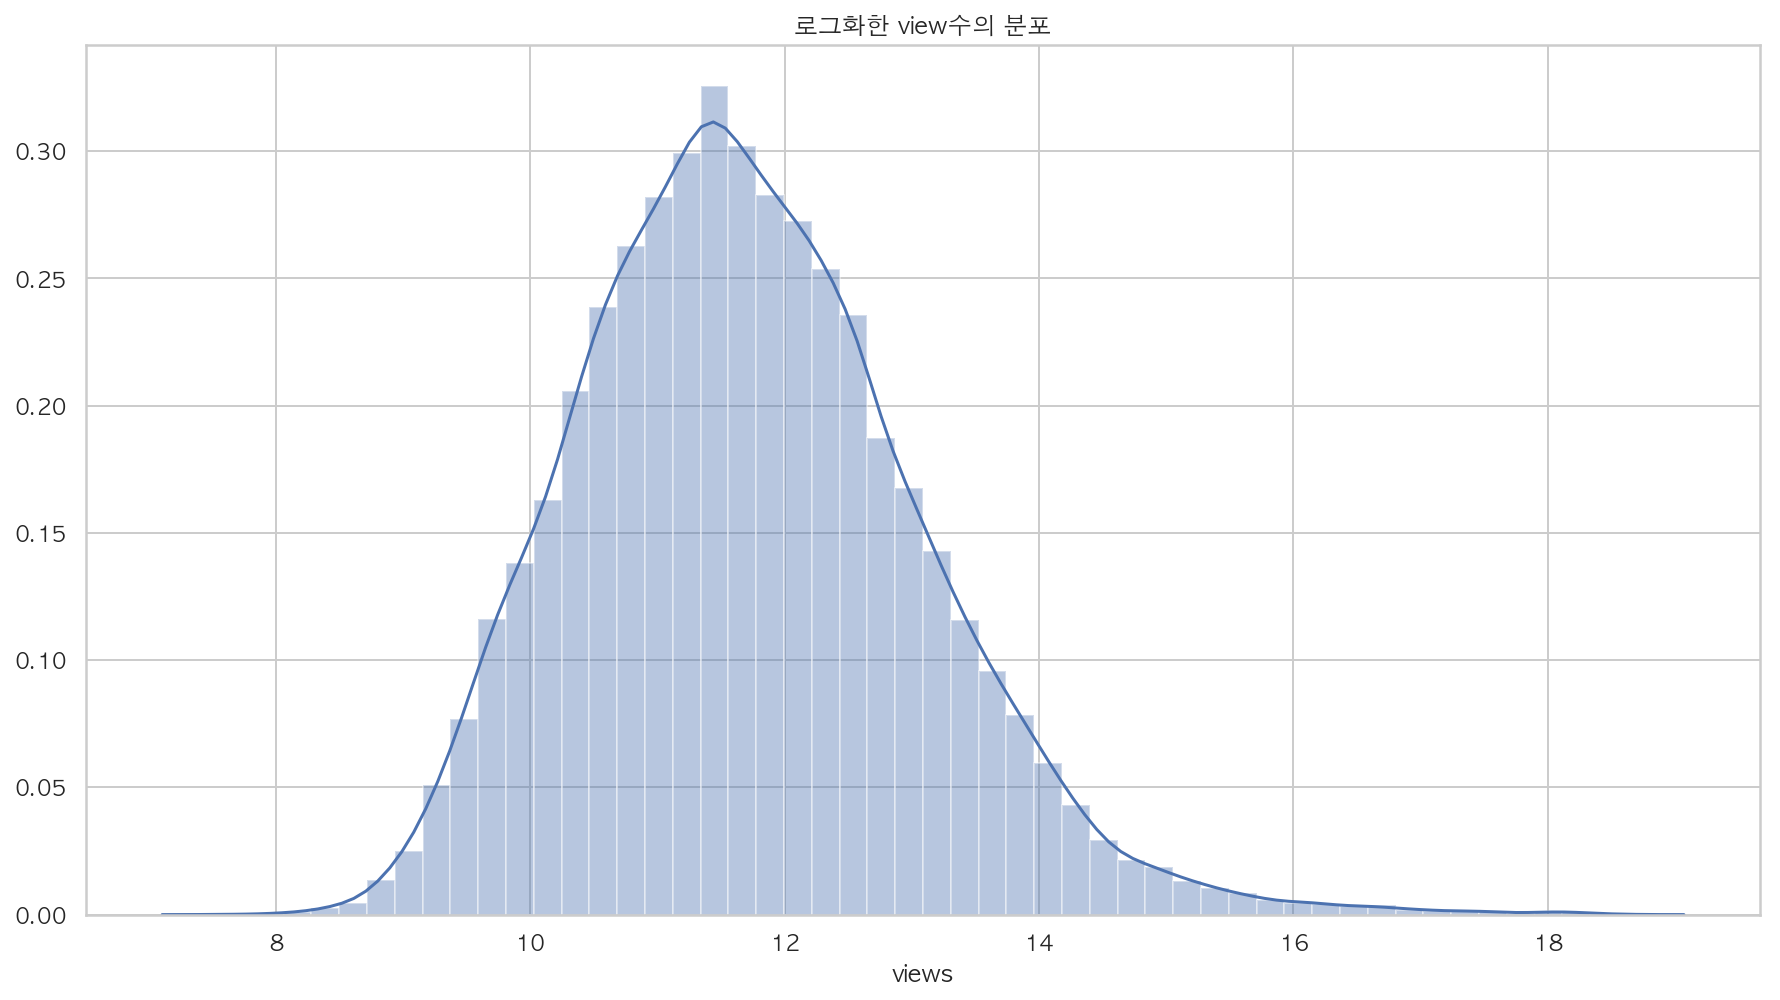

In [5]:
plt.figure(figsize=(15, 8))
sns.distplot(df.views.apply(np.log))
plt.title("로그화한 view수의 분포")
plt.show()

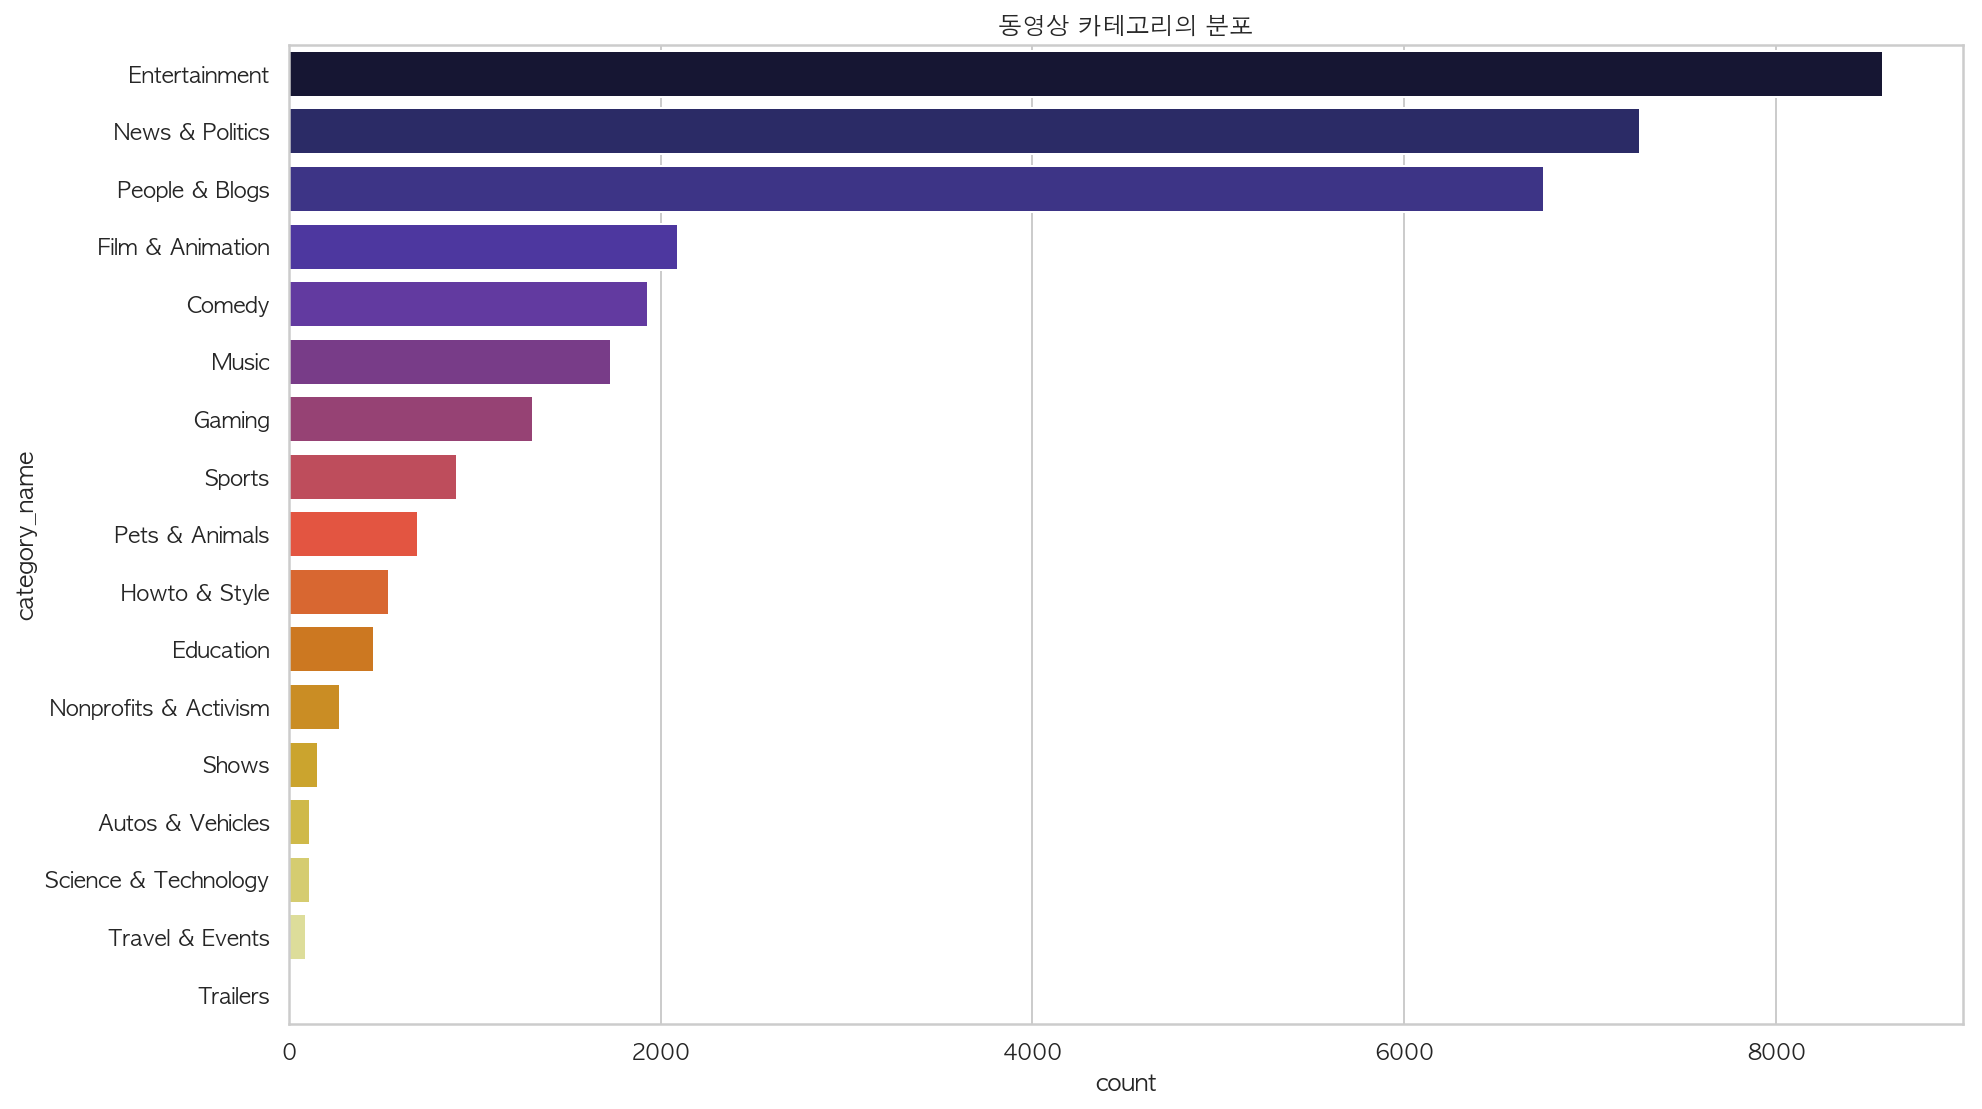

In [6]:
plt.figure(figsize=(15, 9))
sns.countplot(y=df.category_name, palette="CMRmap",
              order=df.category_name.value_counts().index)
plt.title("동영상 카테고리의 분포")
plt.show()

`방금처럼 분포를 그려볼 수 없을 때, 
이 분포의 특성을 나타내는 몇가지 숫자로 데이터의 분포에 대한 정보를 줄 수 있는데, 이 숫자들이 기술통계량이다. `

**(근데 우리는 21세기에 살고 있다. 그냥 그래프로...)**

#### 평균, 중앙값, 최빈값

> **평균을 믿으시나요?**
 
 <img src="https://misc.ridibooks.com/cover/222001933/xxlarge">

#### 최빈값, 중앙값, 평균의 관계

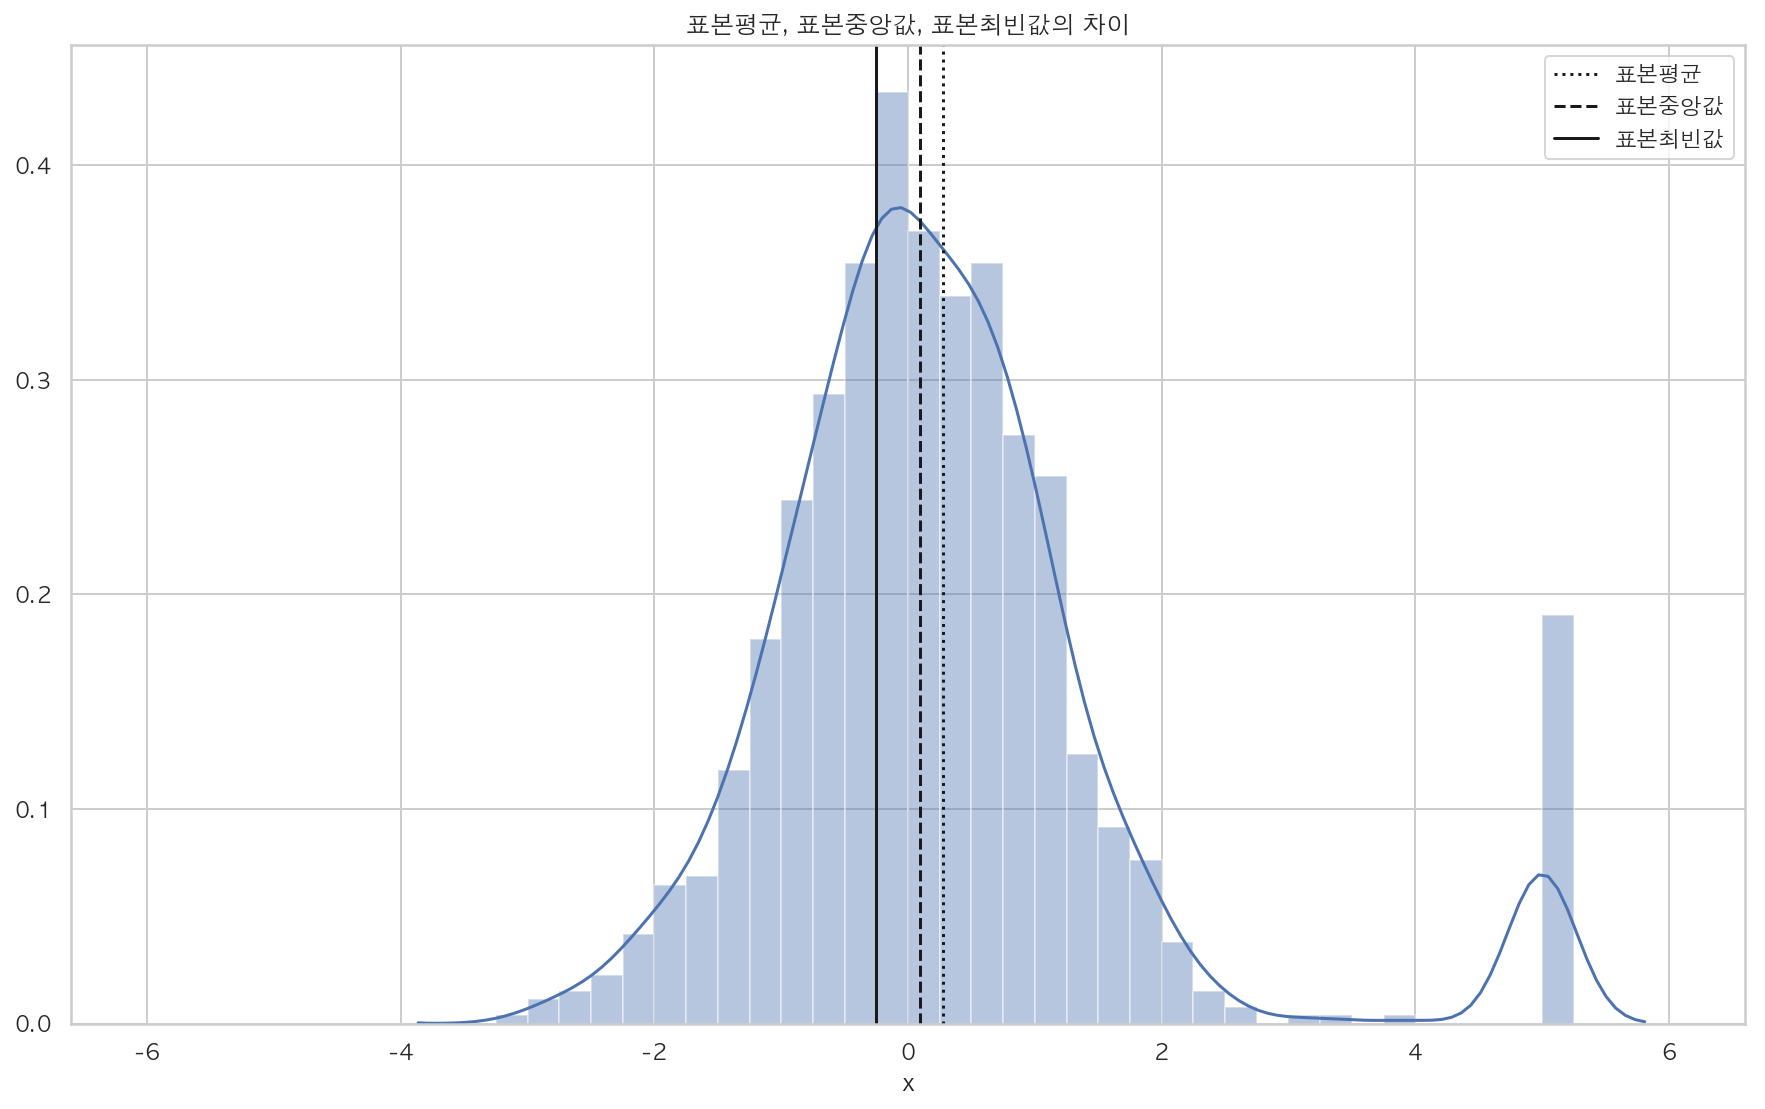

In [7]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
plt.figure(figsize=(15, 9))
sns.distplot(x, bins=bins)
plt.axvline(np.mean(x), c='k', ls=":", label="표본평균")
plt.axvline(np.median(x), c='k', ls="--", label="표본중앙값")
ns, _ = np.histogram(x, bins=bins)
plt.axvline(bins[np.argmax(ns)], c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

#### Multimodal distribution

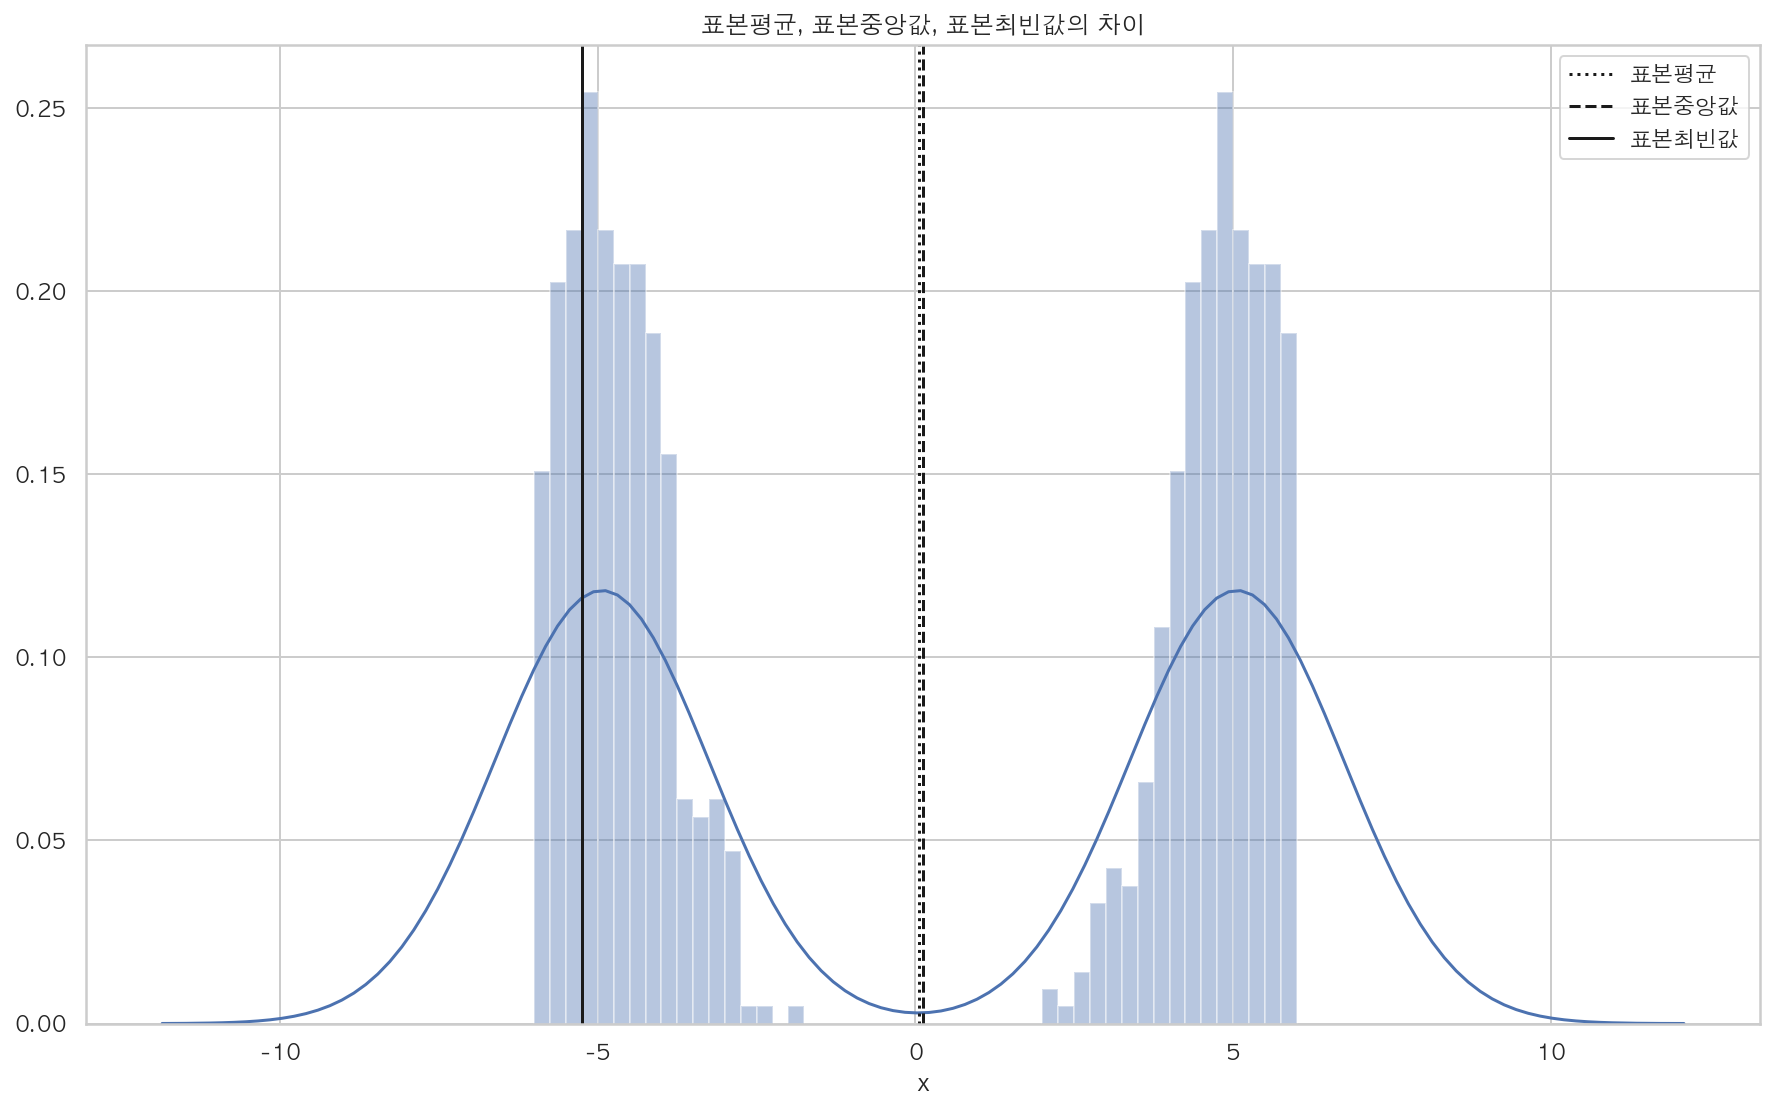

In [8]:
np.random.seed(1)
x = np.random.normal(size=500)
x = np.hstack([x - 5, x + 5])
bins = np.linspace(-6, 6, 12 * 4 + 1)
plt.figure(figsize=(15, 9))
sns.distplot(x, bins=bins)
plt.axvline(np.mean(x), c='k', ls=":", label="표본평균")
plt.axvline(np.median(x), c='k', ls="--", label="표본중앙값")
ns, _ = np.histogram(x, bins=bins)
plt.axvline(bins[np.argmax(ns)], c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

### 시각화
<p id="vis">
    
 - [Python의 다양한 시각화 패키지](https://towardsdatascience.com/reviewing-python-visualization-packages-fa7fe12e622b)
 - 더 아름다운 시각화를 위해서는 
   * https://d3js.org/
   * https://www.highcharts.com/demo

#### Matplotlib와 Seaborn

* **matplotlib** : https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/
* **seaborn** : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
* **Pandas** : https://datascienceschool.net/view-notebook/372443a5d90a46429c6459bba8b4342c/

### Data Report

<p id="report">
    
    1.개별 데이터 설명
    2.데이터간의 관계
    3.가설 세우기 / 가설 검정

### 1. 개별데이터 설명

In [57]:
# 데이터 타입
df.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category_name                     object
trending_lag                       int64
published_daytime                 object
dtype: object

In [60]:
# 주요 카테고리 변수의 카테고리 갯수
print("num of channels :", len(df.channel_title.unique()))
print("num of categories :", len(df.category_name.unique()))

num of channels : 3971
num of categories : 17


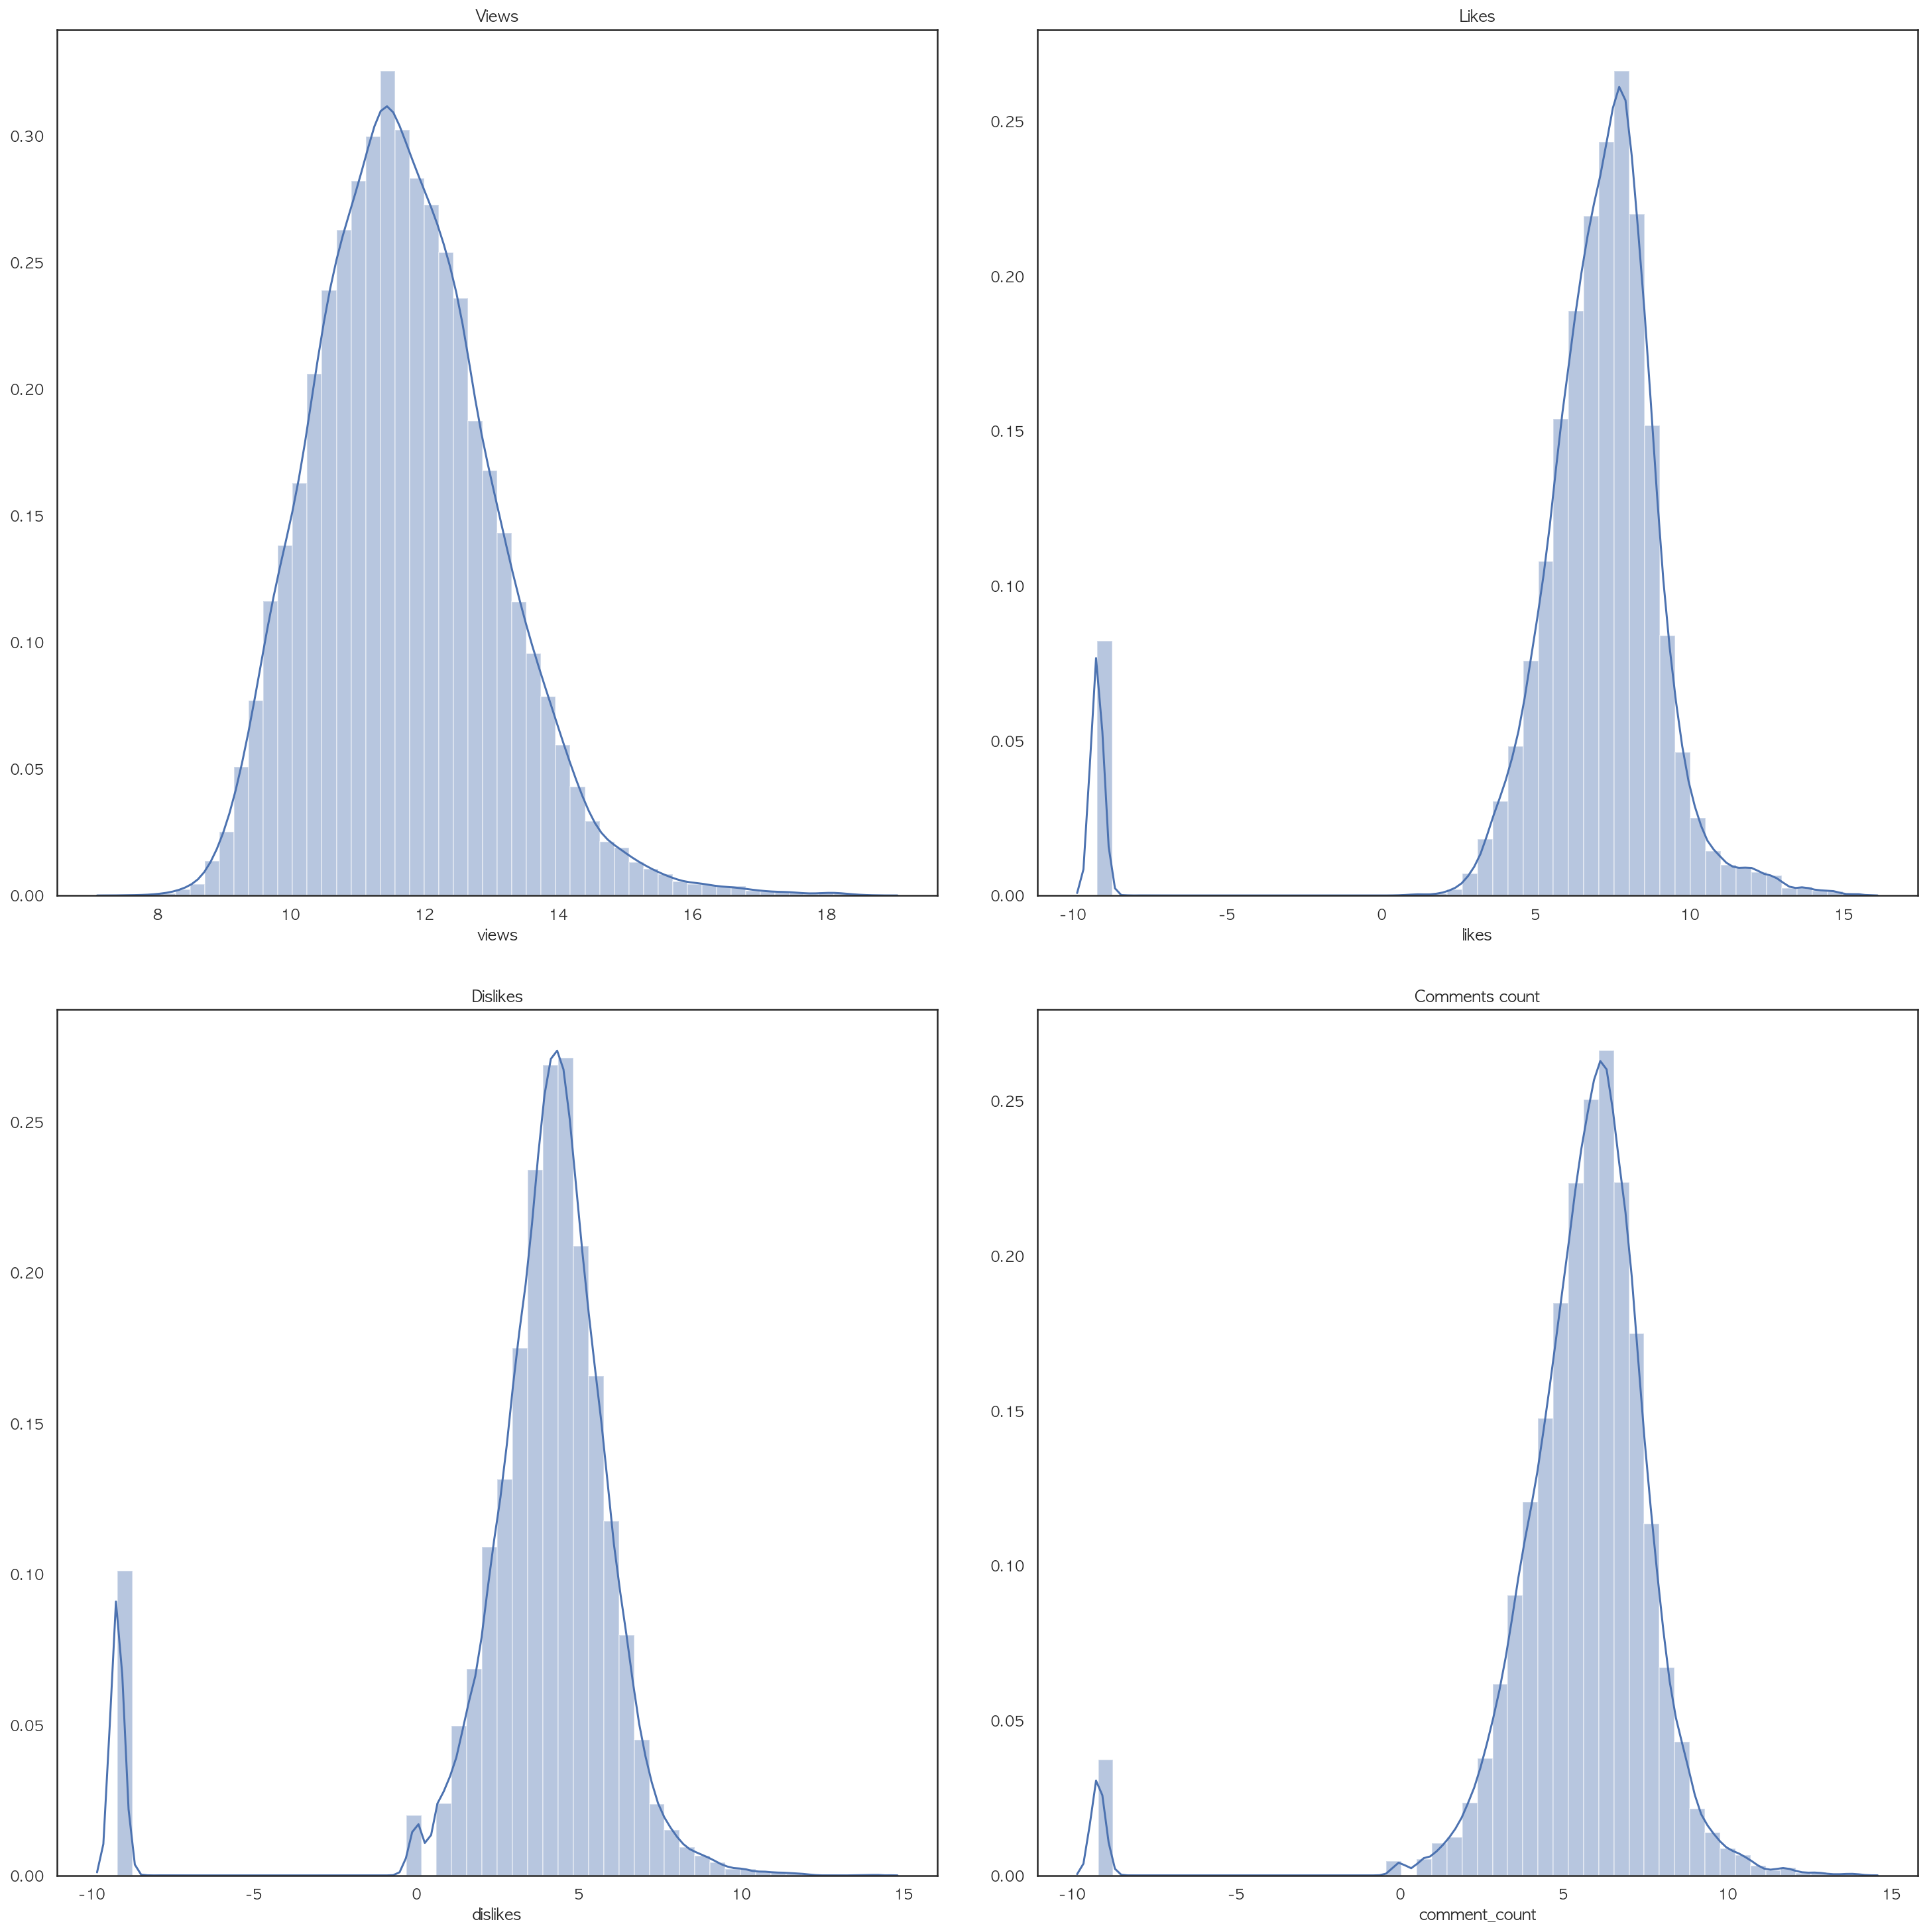

In [61]:
# 주요 실수형 자료의 분포
plt.figure(figsize=(21, 21))
plt.subplot(2, 2, 1)
sns.distplot(df.views.apply(np.log))
plt.title("Views")
plt.subplot(2, 2, 2)
sns.distplot(df.likes.apply(lambda x: np.log(x+1e-4)))
plt.title("Likes")
plt.subplot(2, 2, 3)
sns.distplot(df.dislikes.apply(lambda x: np.log(x+1e-4)))
plt.title("Dislikes")
plt.subplot(2, 2, 4)
sns.distplot(df.comment_count.apply(lambda x: np.log(x+1e-4)))
plt.title("Comments count")
plt.tight_layout()
plt.show()

In [17]:
import datetime


def str2date(s):

    string_format = '%y.%d.%m'

    return datetime.datetime.strptime(s, string_format)


def str2date2(s):
    s = s.replace("T", " ")
    s = s[:-5]

    string_format = '%Y-%m-%d %H:%M:%S'

    return datetime.datetime.strptime(s, string_format)

In [19]:
df.trending_date = df.trending_date.apply(str2date)

df.publish_time = df.publish_time.apply(str2date2)

df["trending_lag"] = df.trending_date - df.publish_time

df.trending_lag = df.trending_lag.apply(lambda x: x.days)

df.trending_lag = df.trending_lag.apply(lambda x: x if x < 50 else 50)

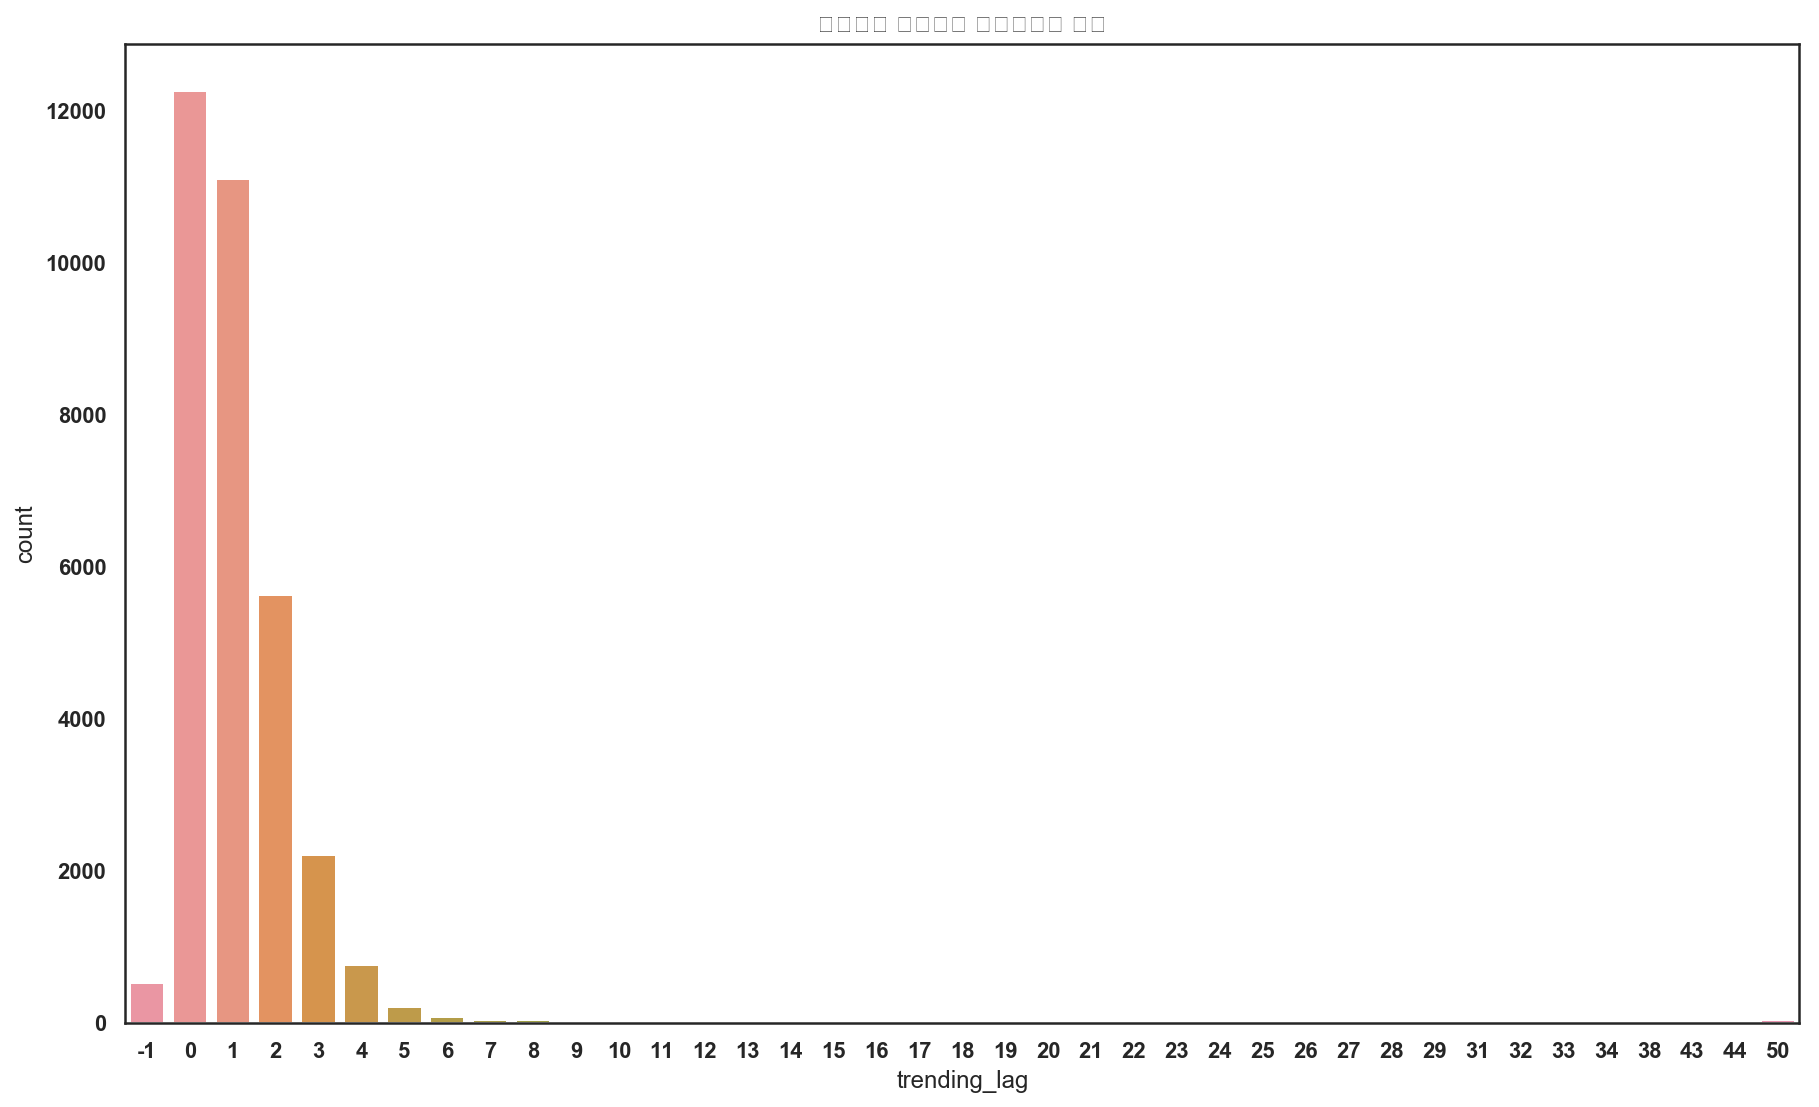

In [20]:
plt.figure(figsize=(15, 9))
sns.countplot(x=df.trending_lag)
plt.title("트렌드를 타기까지 소요시간의 분포")
plt.show()

### 2. 변수들간의 관계 탐구

 - 이 때는 주로 목적으로하는 변수를 중심으로 분석을 시작한다. 
 - 이 케이스에서는 조회수를 타겟으로 하겠다.

##### Pairplot

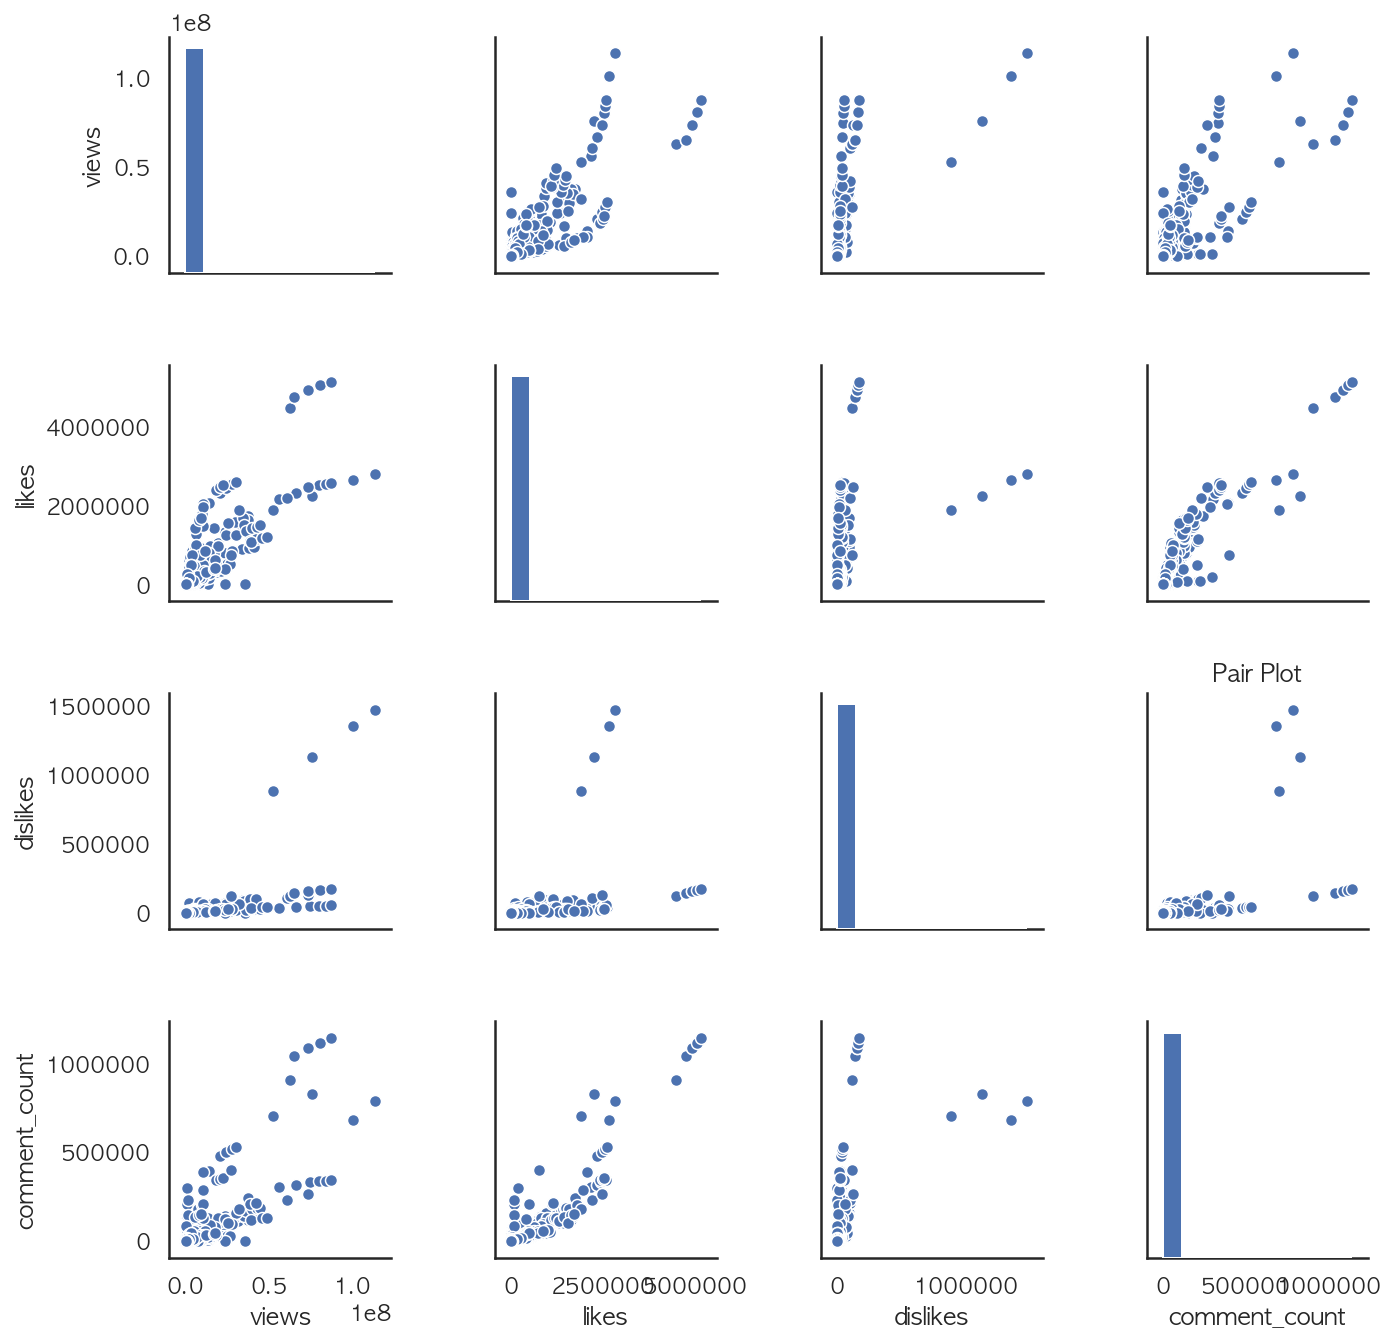

In [69]:
sns.pairplot(df[["views", "likes", "dislikes", "comment_count"]])
plt.title("Pair Plot")
plt.show()

##### Pearson 상관계수 ; $r, \rho$

$$
\rho_{i, j} = \dfrac{cov(x_i, x_j)}{var(x_i)var(x_j)}
$$


In [81]:
for col in ["likes", 'dislikes', 'comment_count']:
    print("views vs {}".format(col),
          sp.stats.stats.pearsonr(df.views, df[col]))

views vs likes (0.861506182616547, 0.0)
views vs dislikes (0.5819256986871084, 0.0)
views vs comment_count (0.811096053636273, 0.0)


In [83]:
df[["views", "likes", "dislikes", "comment_count"]].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.861506,0.581926,0.811096
likes,0.861506,1.000000,0.427723,0.927405
dislikes,0.581926,0.427723,1.000000,0.556256
comment_count,0.811096,0.927405,0.556256,1.000000


**상관계수 히트맵**

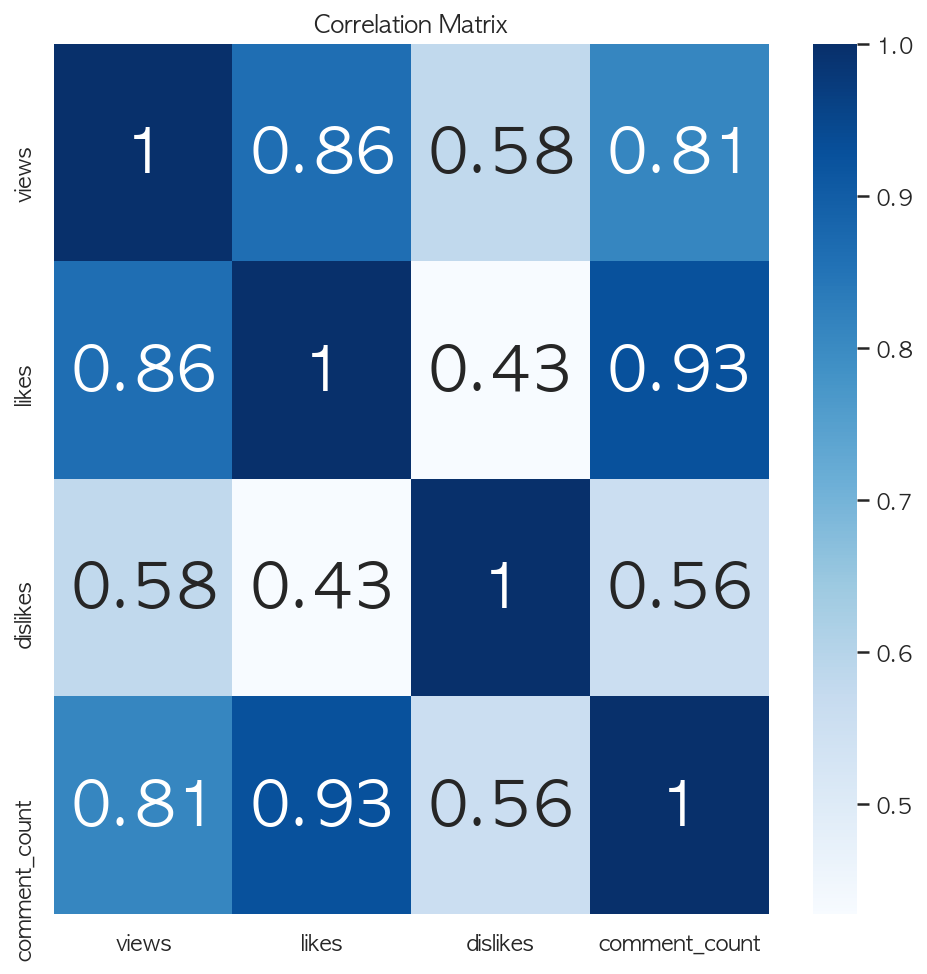

In [90]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[["views", "likes", "dislikes", "comment_count"]
               ].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

#####  Pearson correlation 의 한계 
  - Pearson 상관계수는 두 변수간의 선형적인 상관관계만을 나타내는 숫자이다. 
  - 따라서 숫자만으로 상관관계를 파악하기 보다 그래프를 꼭 그려서 확인하도록 한다. 

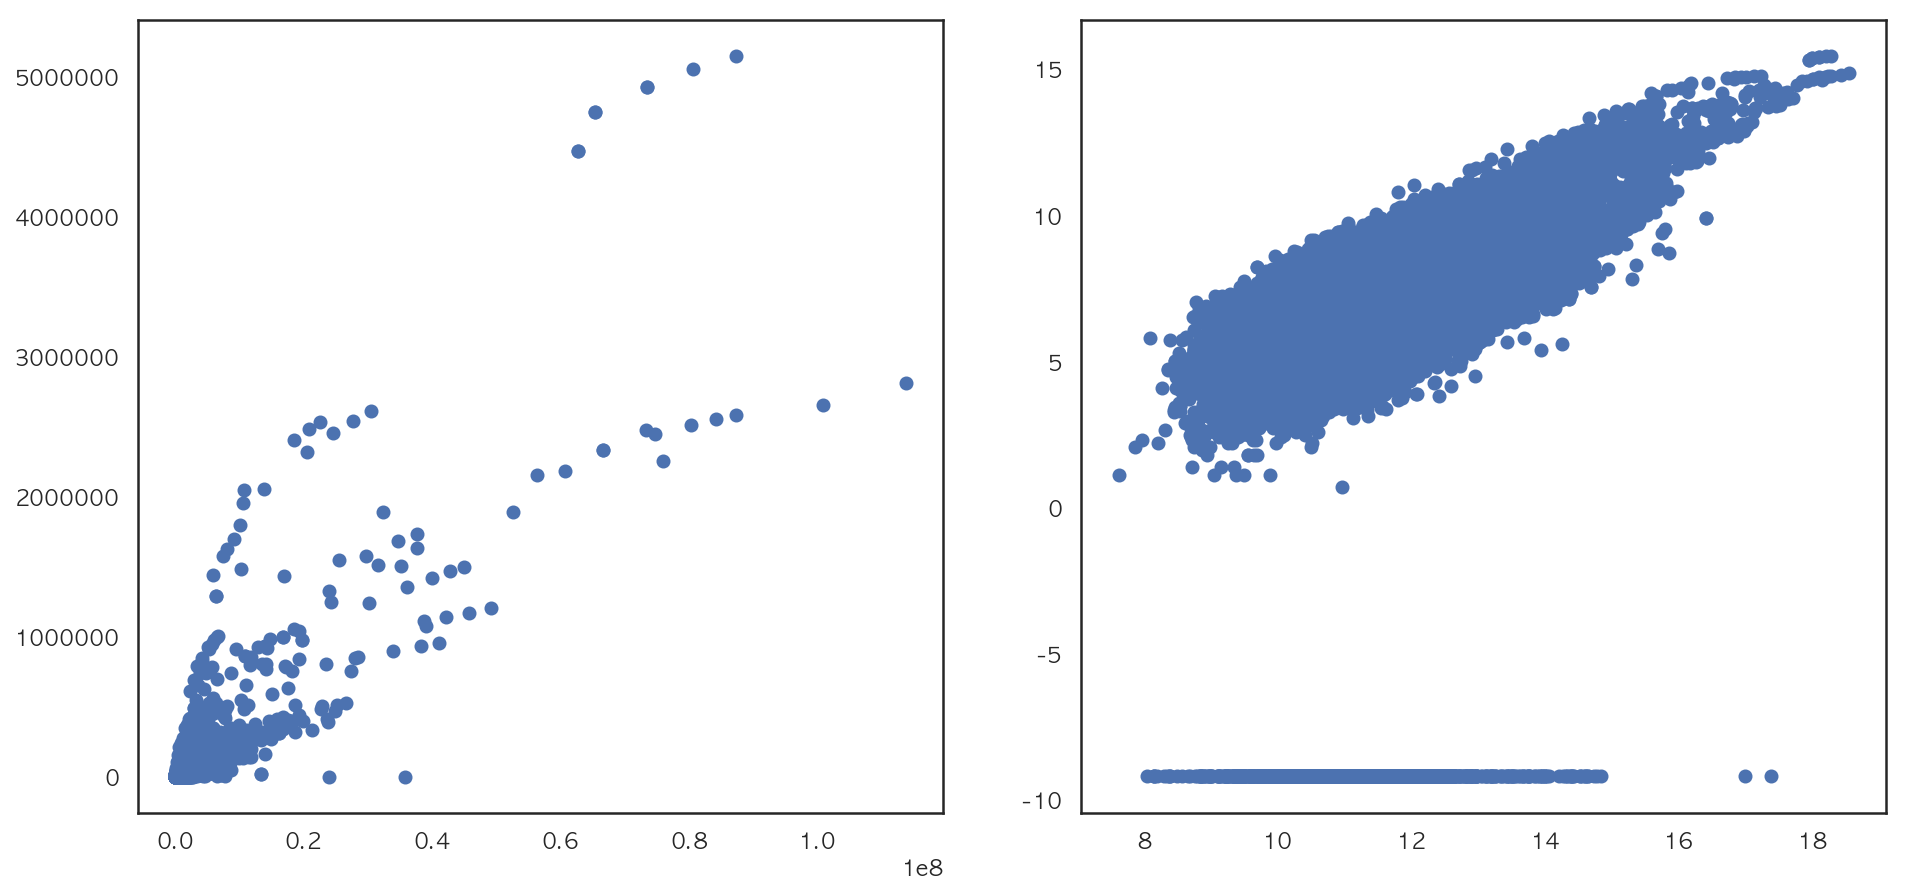

In [89]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(df.views, df.likes)
plt.subplot(1, 2, 2)
plt.scatter(df.views.apply(np.log), df.likes.apply(lambda x: np.log(x+1e-4)))
plt.tight_layout()
plt.show()

In [92]:
print("로그화한 views 와 likes의 상관계수", sp.stats.stats.pearsonr(
    df.views.apply(np.log), df.likes.apply(lambda x: np.log(x+1e-4))))

로그화한 views 와 likes의 상관계수 (0.38501928621985515, 0.0)


##### 카테고리 변수와의 관계

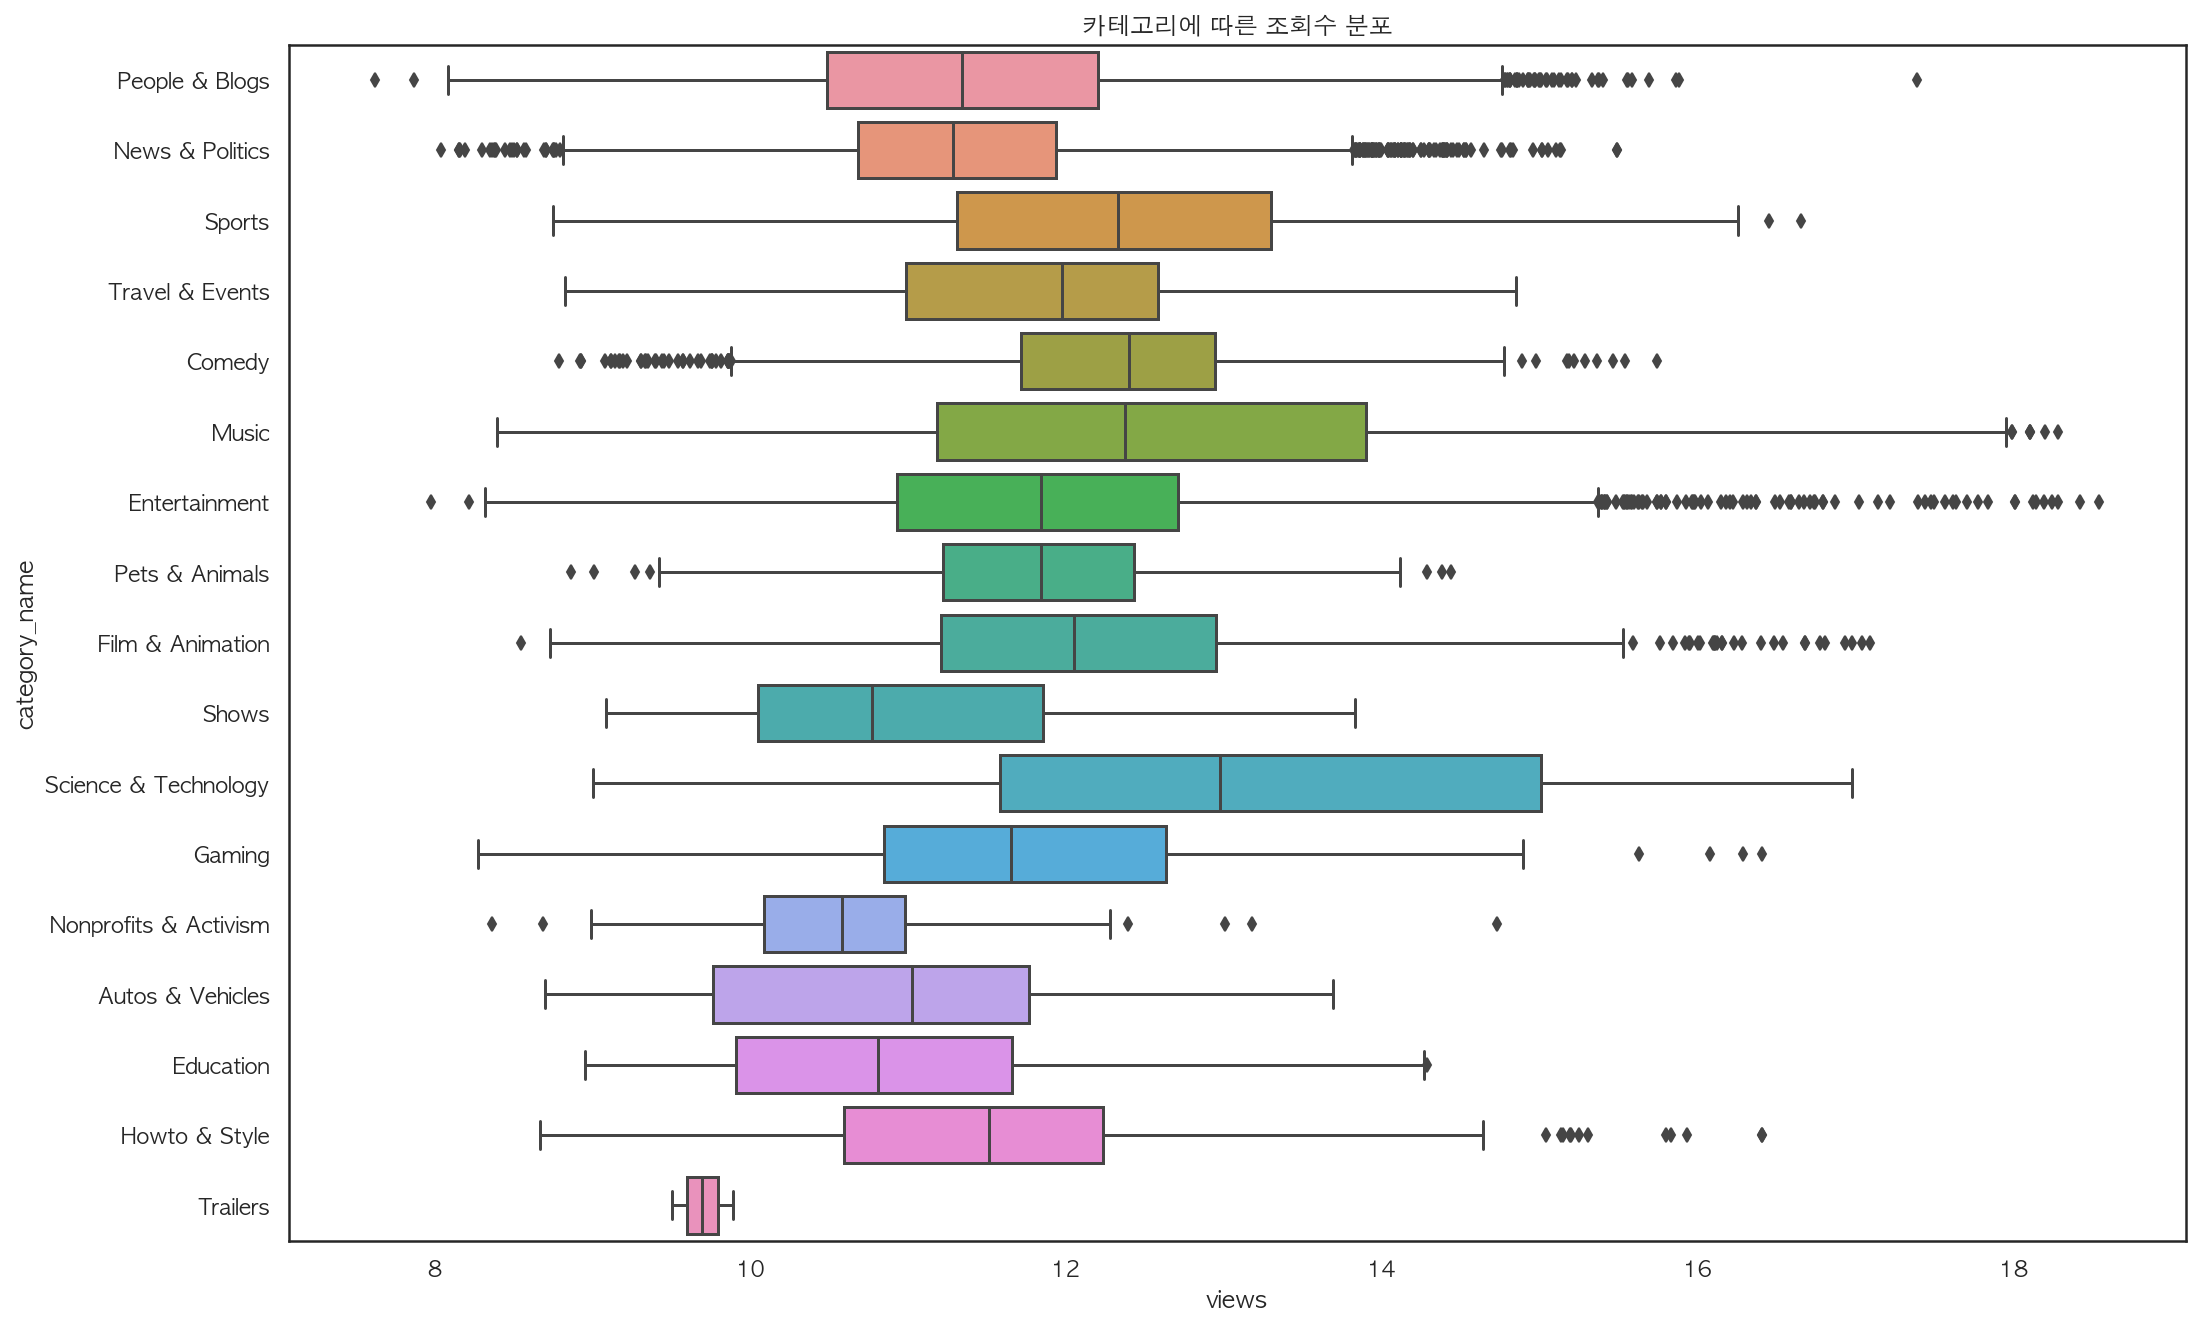

In [93]:
plt.figure(figsize=(17, 11))
sns.boxplot(x=df.views.apply(np.log), y=df.category_name)
plt.title("카테고리에 따른 조회수 분포")
plt.show()

##### One-way anova

In [106]:
result = sm.OLS.from_formula("np.log(views) ~ C(category_name)", df).fit()

sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
C(category_name),16.0,5531.078213,345.692388,217.070905,0.0
Residual,33006.0,52563.115183,1.592532,NaN,NaN


In [108]:
model = sm.OLS.from_formula(
    "np.log(views) ~ np.log(likes + 1e-4) + np.log(comment_count + 1e-4) + C(category_name) - 1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(views)   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     217.1
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        22:14:00   Log-Likelihood:                -54532.
No. Observations:               33023   AIC:                         1.091e+05
Df Residuals:                   33006   BIC:                         1.092e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [111]:
# sm.stats.multicomp.MultiComparison(df.views.apply(np.log), df.category_name).tukeyhsd().summary()

In [103]:
sm.stats.anova_lm(result, typ=2)

,sum_sq,df,F,PR(>F)
C(category_name),499836.405331,17.0,25613.948568,0.000000e+00
np.log(likes + 1e-4),1639.855409,1.0,1428.575267,4.449192e-306
np.log(comment_count + 1e-4),7861.636630,1.0,6848.737748,0.000000e+00
Residual,37885.149771,33004.0,NaN,NaN


### 3. 가설 검정

가설 검정에서 가장 중요한 것은 의미있는 가설을 설정하는 일이다. 이에 대해 데이터에 따라 만들 수 있는 가설은 무수히 많다. 다음에 무엇을 해야할지 모르는 와중에서 수없이 많은 시도를 해 데이터 속에 담긴 의미 있는 정보를 찾아내는 것이 데이터분석가가 하는 일이기에 호기심을 가지고 계속 데이터를 탐색한다.

**조회 수가 많은 데이터는 무슨 특징이 있을까 ?**

In [12]:
df.sort_values(by="views", ascending=False)[
    ["category_name", "title", "channel_title", "views", "likes", "dislikes"]].head(10)

,category_name,title,channel_title,views,likes,dislikes
4742,Entertainment,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,2811223,1470388
4583,Entertainment,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567,2656686,1353663
3949,Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245,2584675,52176
29333,Music,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865,5150839,172570
3681,Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,84281319,2555414,51008
29072,Music,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,80738011,5053338,165854
3475,Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,80360459,2513104,49170
4384,Entertainment,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,75969469,2251837,1127817
3312,Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,74789251,2444965,46172
28841,Music,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,73463137,4924056,156026


In [13]:
df.groupby(by="channel_title").max().sort_values(by="views", ascending=False)[
    ["category_name", "title", "views", "likes", "dislikes"]].head(10)

,category_name,title,views,likes,dislikes
channel_title,,,,,
YouTube Spotlight,Entertainment,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,2811223,1470388
Marvel Entertainment,Entertainment,Where Were Ant-Man and the Wasp? | New Trailer...,87450245,2584675,52176
ibighit,Music,j-hope 'Daydream (백일몽)' MV,87430865,5150839,172570
ChildishGambinoVEVO,Music,Childish Gambino - This Is America (Official V...,73432600,2478908,124291
Sony Pictures Entertainment,Entertainment,VENOM - Official Trailer (HD),49185287,1204868,42254
jypentertainment,Music,Yubin 숙녀 (淑女) M/V,42267579,1141242,99548
Bruno Mars,Music,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,37728802,1629948,56304
Kylie Jenner,People & Blogs,To Our Daughter,35832484,0,0
TaylorSwiftVEVO,Music,"Taylor Swift - End Game ft. Ed Sheeran, Future",35218973,1681449,91765


**조회수 상위 10%의 카테고리들의 분포는 다를까?**

In [14]:
df["views"].quantile(0.9)

677631.5999999999

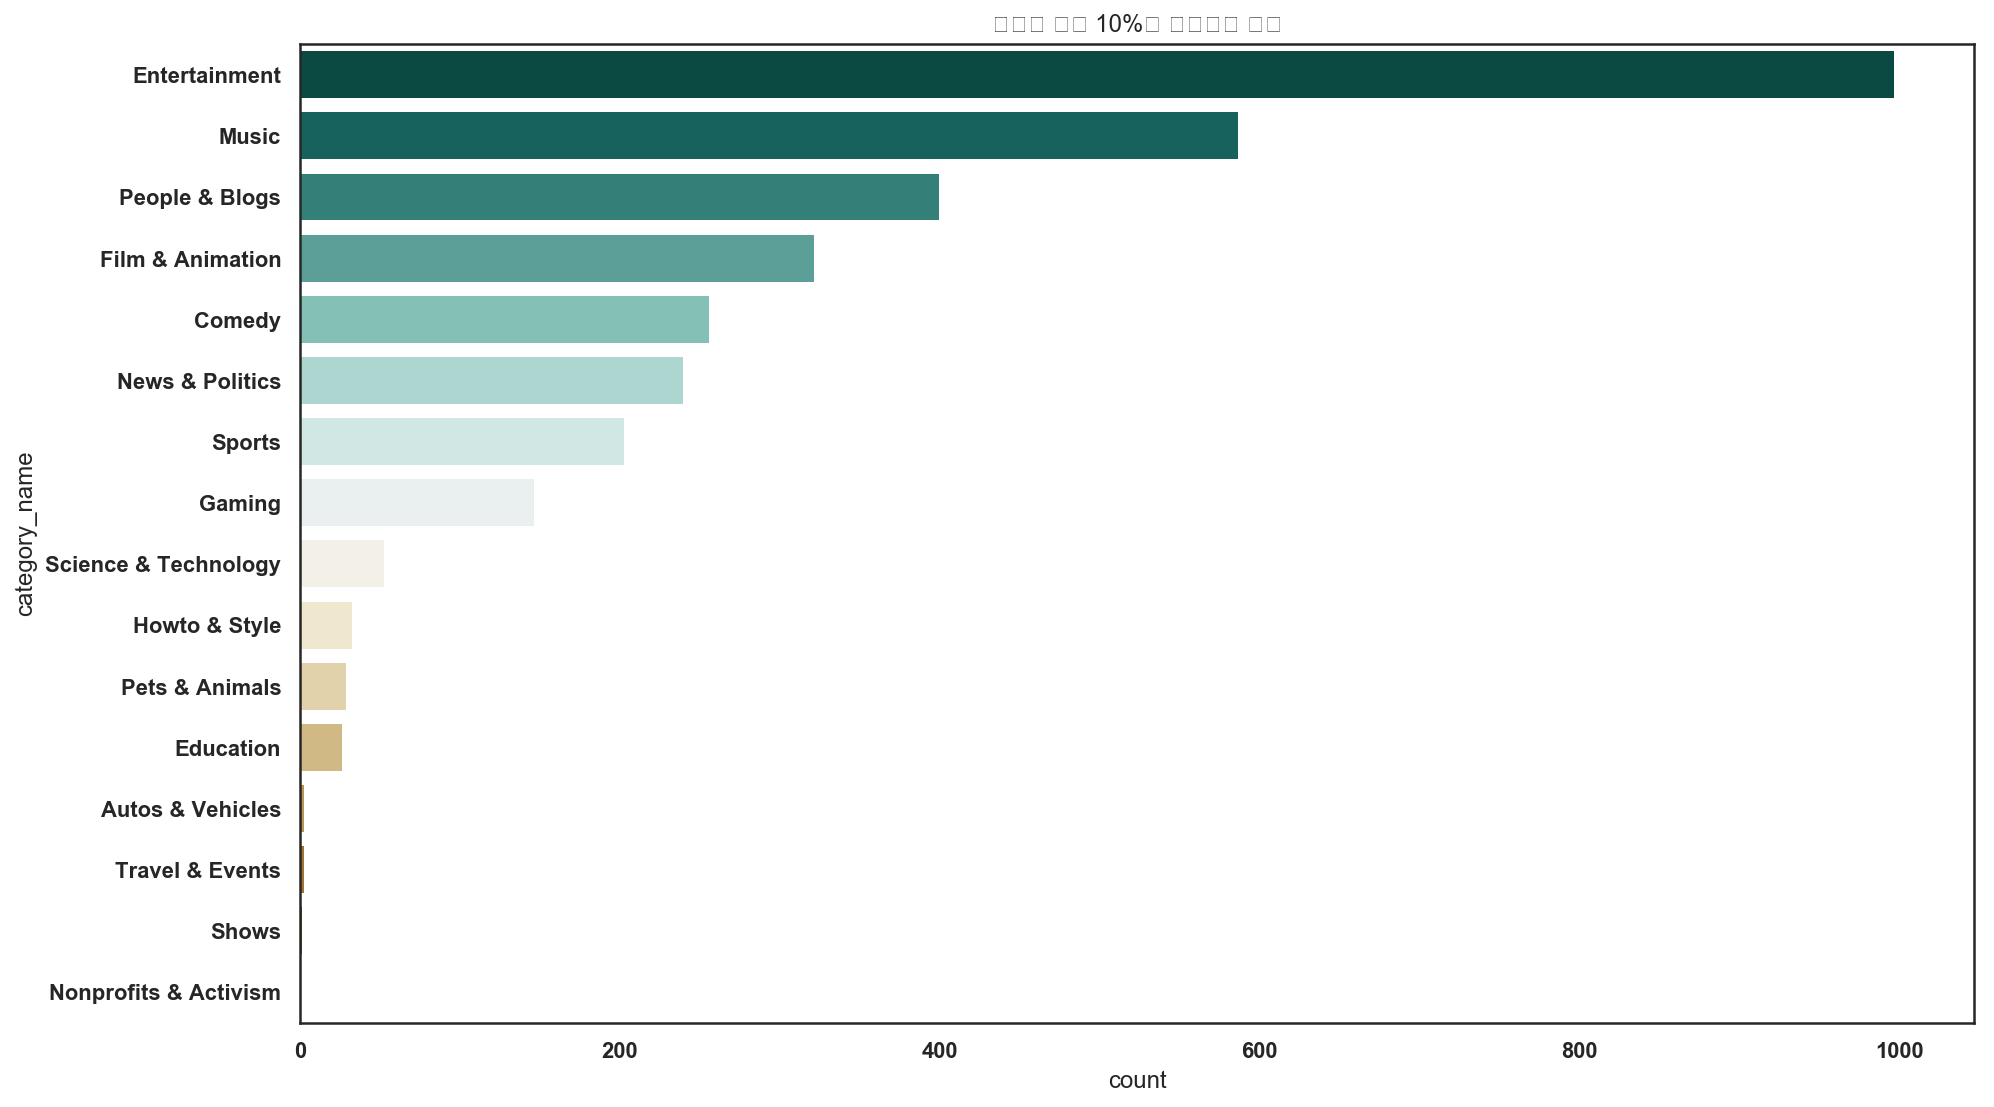

In [15]:
plt.figure(figsize=(15, 9))
top10p_viewed = df.where(df.views >= df["views"].quantile(
    0.9)).sort_values(by="views", ascending=False)
sns.countplot(y=top10p_viewed.category_name,
              order=top10p_viewed.category_name.value_counts().index,
              palette="BrBG_r")
plt.title("조회수 상위 10%의 카테고리 분포")
plt.show()

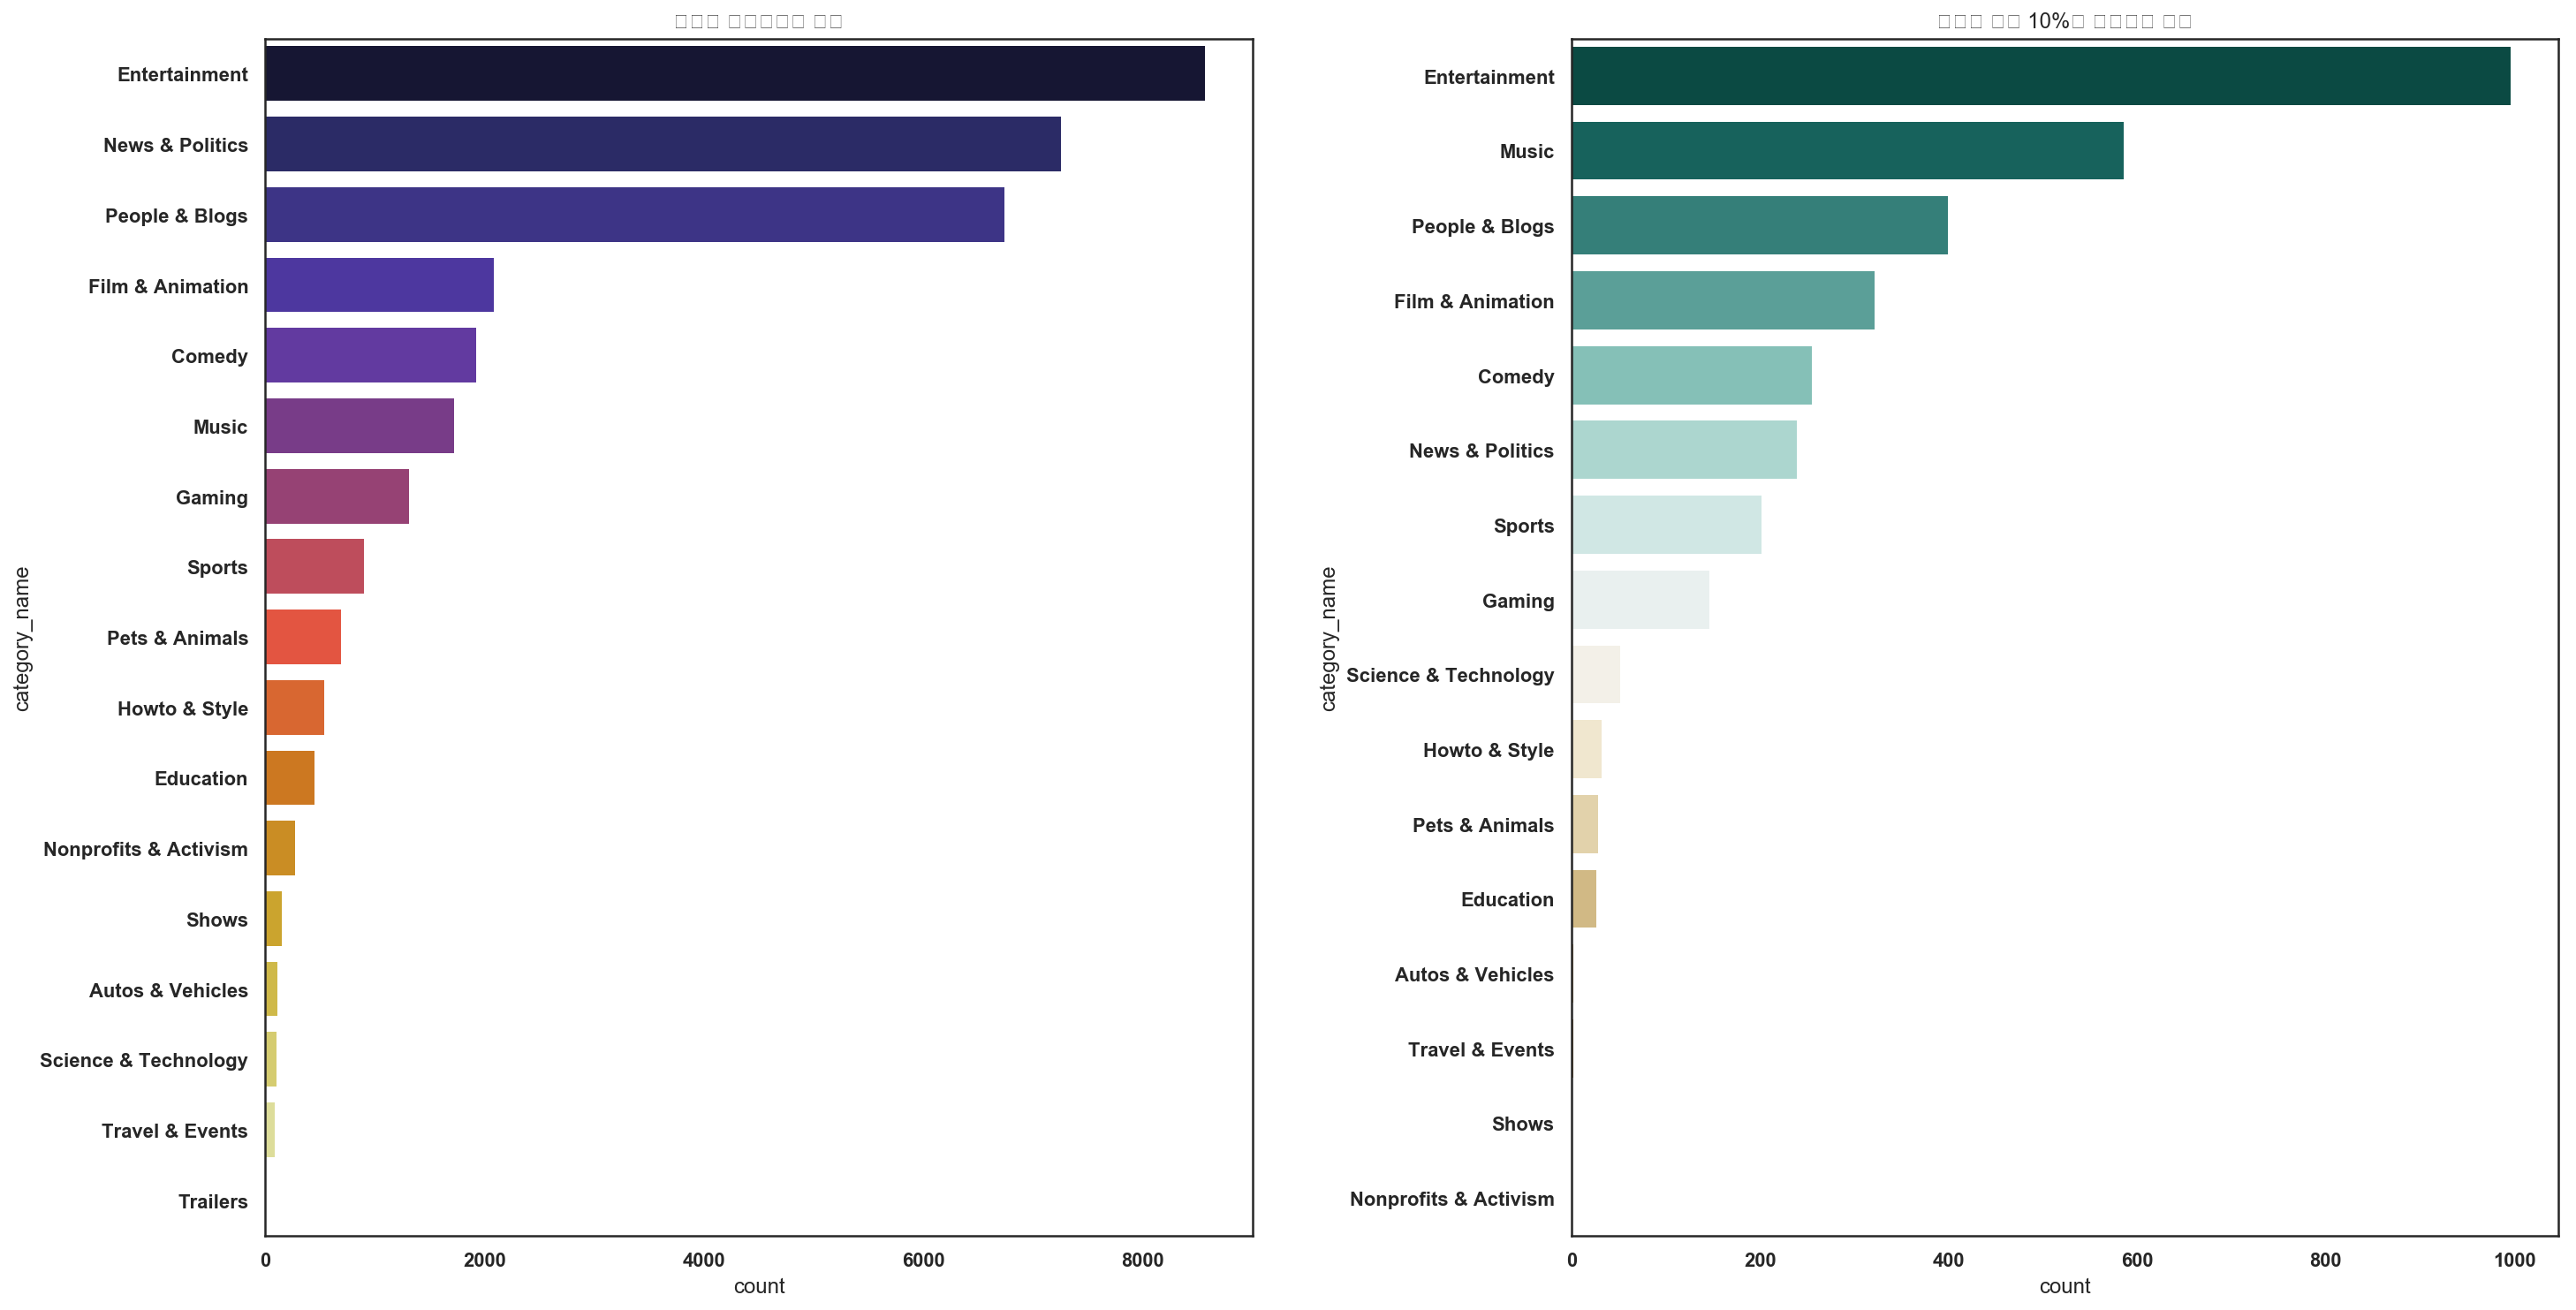

In [16]:
plt.figure(figsize=(21, 11))
plt.subplot(1, 2, 1)
sns.countplot(y=df.category_name, palette="CMRmap",
              order=df.category_name.value_counts().index)
plt.title("동영상 카테고리의 분포")

plt.subplot(1, 2, 2)
top10p_viewed = df.where(df.views >= df.quantile(
    0.9)["views"]).sort_values(by="views", ascending=False)
sns.countplot(y=top10p_viewed.category_name,
              order=top10p_viewed.category_name.value_counts().index,
              palette="BrBG_r")
plt.title("조회수 상위 10%의 카테고리 분포")

plt.tight_layout()
plt.show()

**방금과 같은 질문을 꾸준히 하다보면 주장하고 싶은 바가 생기고 이를 가설로 만들면 된다.**


**가설 1 : Entertainment 카테고리의 영상 조회수가 Music 카테고리 영상의 조회수보다 많다고 할 수 있는가?**


$H_0 : $ Entertainment의 조회수와 Music 카테고리의 조회수는 같다. <br>
$H_1 : $ Entertainment의 조회수가 Music 카테고리의 조회수보다 많다. 


[다시 쓰면]

$H_0 : $ mean(views[category = Entertainment]) = mean(views[category = Music]) = 0 <br>
$H_1 : $ mean(views[category = Entertainment]) > mean(views[category = Music]) > 0

In [121]:
sp.stats.ttest_ind(df.where(df.category_name == "Entertainment").views.dropna().apply(np.log),
                   df.where(df.category_name == "Music").views.dropna().apply(np.log), equal_var=False)

Ttest_indResult(statistic=-16.080613301731013, pvalue=5.659099983963297e-55)

In [126]:
print("Entertainment 일 때의 평균", df.where(df.category_name ==
                                        "Entertainment").views.dropna().apply(np.log).mean())
print("Music 일 때의 평균", df.where(df.category_name ==
                                "Music").views.dropna().apply(np.log).mean())

Entertainment 일 때의 평균 11.873993418957332
Music 일 때의 평균 12.626858240227472


**Conclusion of 1.**

Music 카테고리의 조회수 가 더 높다고 할만 하겠다!

**가설  2. 오전에 배포된 영상과 오후에 배포된 영상 간의 차이가 있을까?**

$H_0 :$ 오전에 배포된 영상과 오후에 배포된 영상은 차이가 없다 ($=$; equal) <br>
$H_1 :$ 오전에 배포된 영상과 오후에 배포된 영상은 차이가 있다 ($\neq$; non-equal) 

일단 그래프 먼저!

In [ ]:
df["published_daytime"] = df.publish_time.apply(
    lambda x: "am" if x.hour < 12 else "pm")

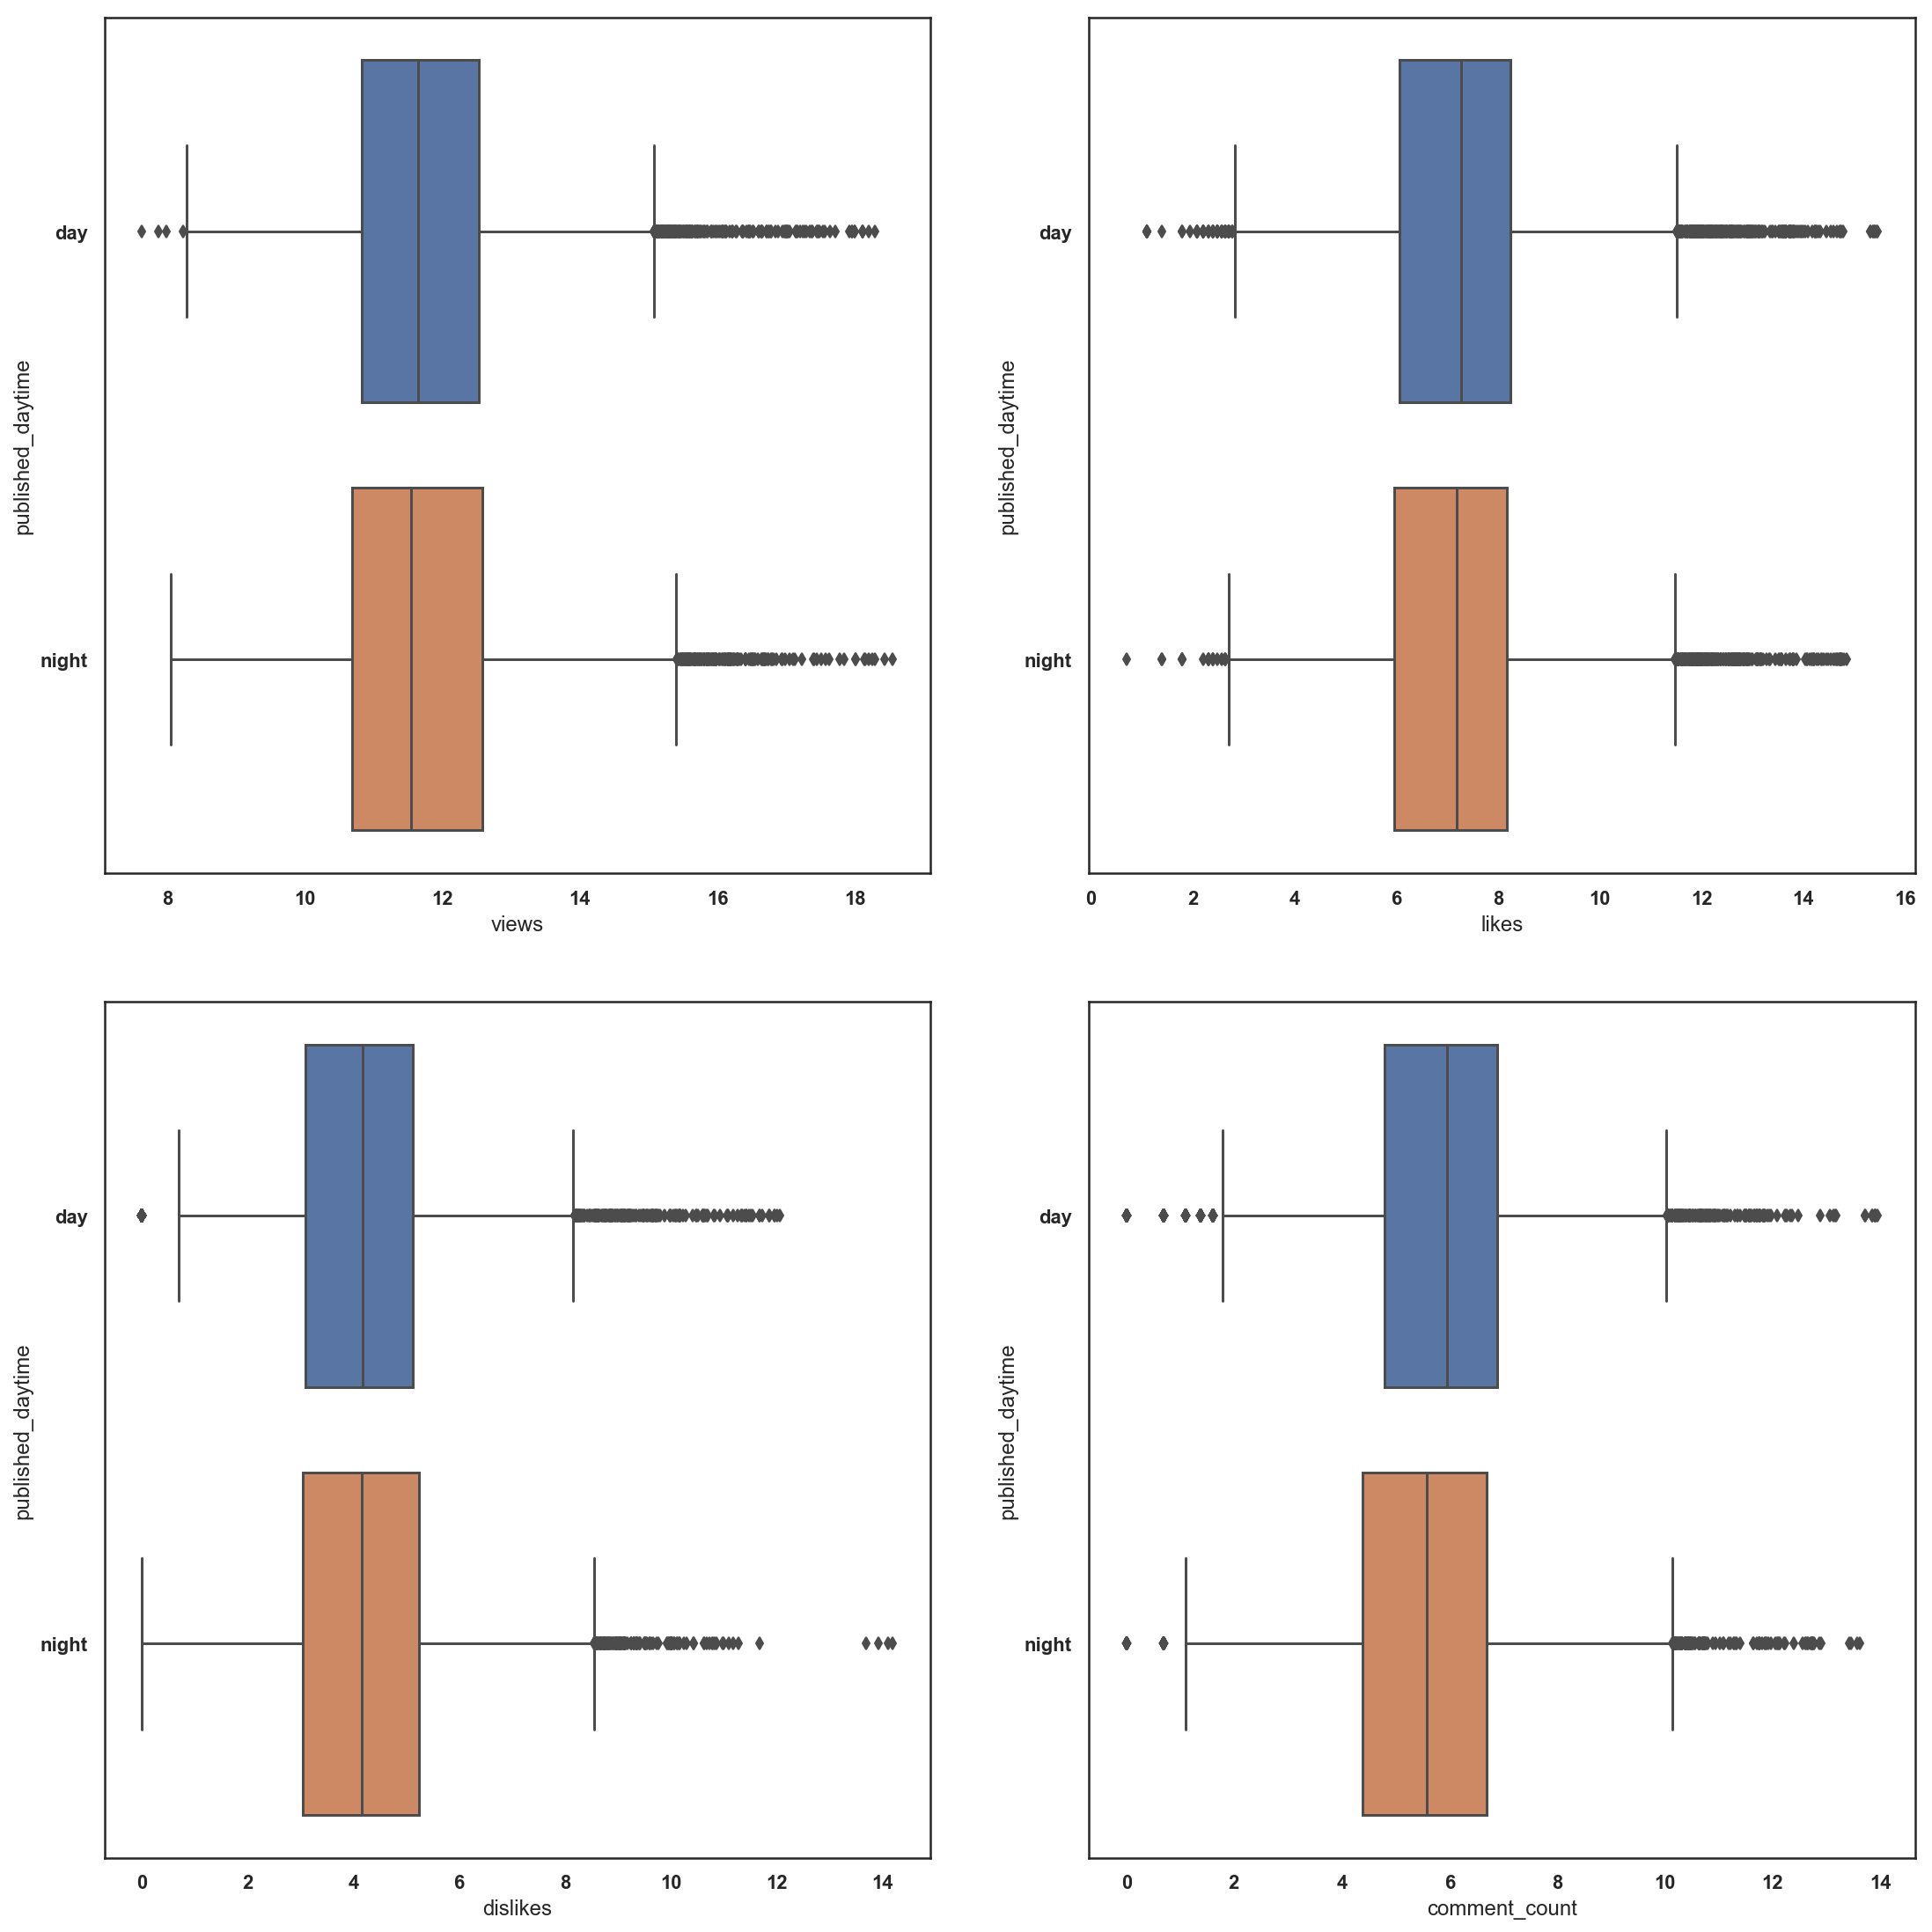

In [24]:
plt.figure(figsize=(16, 16))
plt.title("공개된 시간대에 따른 차이")
plt.subplot(2, 2, 1)
sns.boxplot(x=df.views.apply(np.log), y=df.published_daytime)
plt.subplot(2, 2, 2)
sns.boxplot(x=df.likes.apply(np.log), y=df.published_daytime)
plt.subplot(2, 2, 3)
sns.boxplot(x=df.dislikes.apply(np.log), y=df.published_daytime)
plt.subplot(2, 2, 4)
sns.boxplot(x=df.comment_count.apply(np.log), y=df.published_daytime)

plt.tight_layout()
plt.show()

[댓글 수를 기준으로 다시 쓰면]

$H_0 :$ mean(comment_count[time = am]) $=$  mean(comment_count[time = pm]) <br>
$H_1 :$ mean(comment_count[time = am]) $\neq$  mean(comment_count[time = pm]) 

In [129]:
sp.stats.ttest_ind(df.where(df.published_daytime == "am").dropna().comment_count,
                   df.where(df.published_daytime == "pm").dropna().comment_count, 
                   equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

**Conclusion of 2.**

오후에 공개된 영상이 더 많은 댓글을 받다고 말하기는 힘들다. 다만...

In [128]:
print("오전 일 때의 평균", df.where(df.published_daytime == "day").dropna().comment_count.mean())
print("오후 일 때의 평균", df.where(df.published_daytime == "night").dropna().comment_count.mean())

낮 일 때의 평균 1997.7566914872207
밤 일 때의 평균 2439.090945076695


이전에 언급했듯이 가설은 내가 이 데이터를 통해 주장하고 싶은 것이다. 이 주장은 행동이나 전략으로 이어질 수 있는 것이 좋다고 할 수 있다.

상황 : 유튜브 영상을 녹화하고 업로드를 하려한다. 제목은 어떻게 하면 좋을까? 

**가설  3. 제목에 쓰인 단어의 수는 조회수에 영향을 미친다.**

먼저, 제목의 길이는 어떤 분포인가?

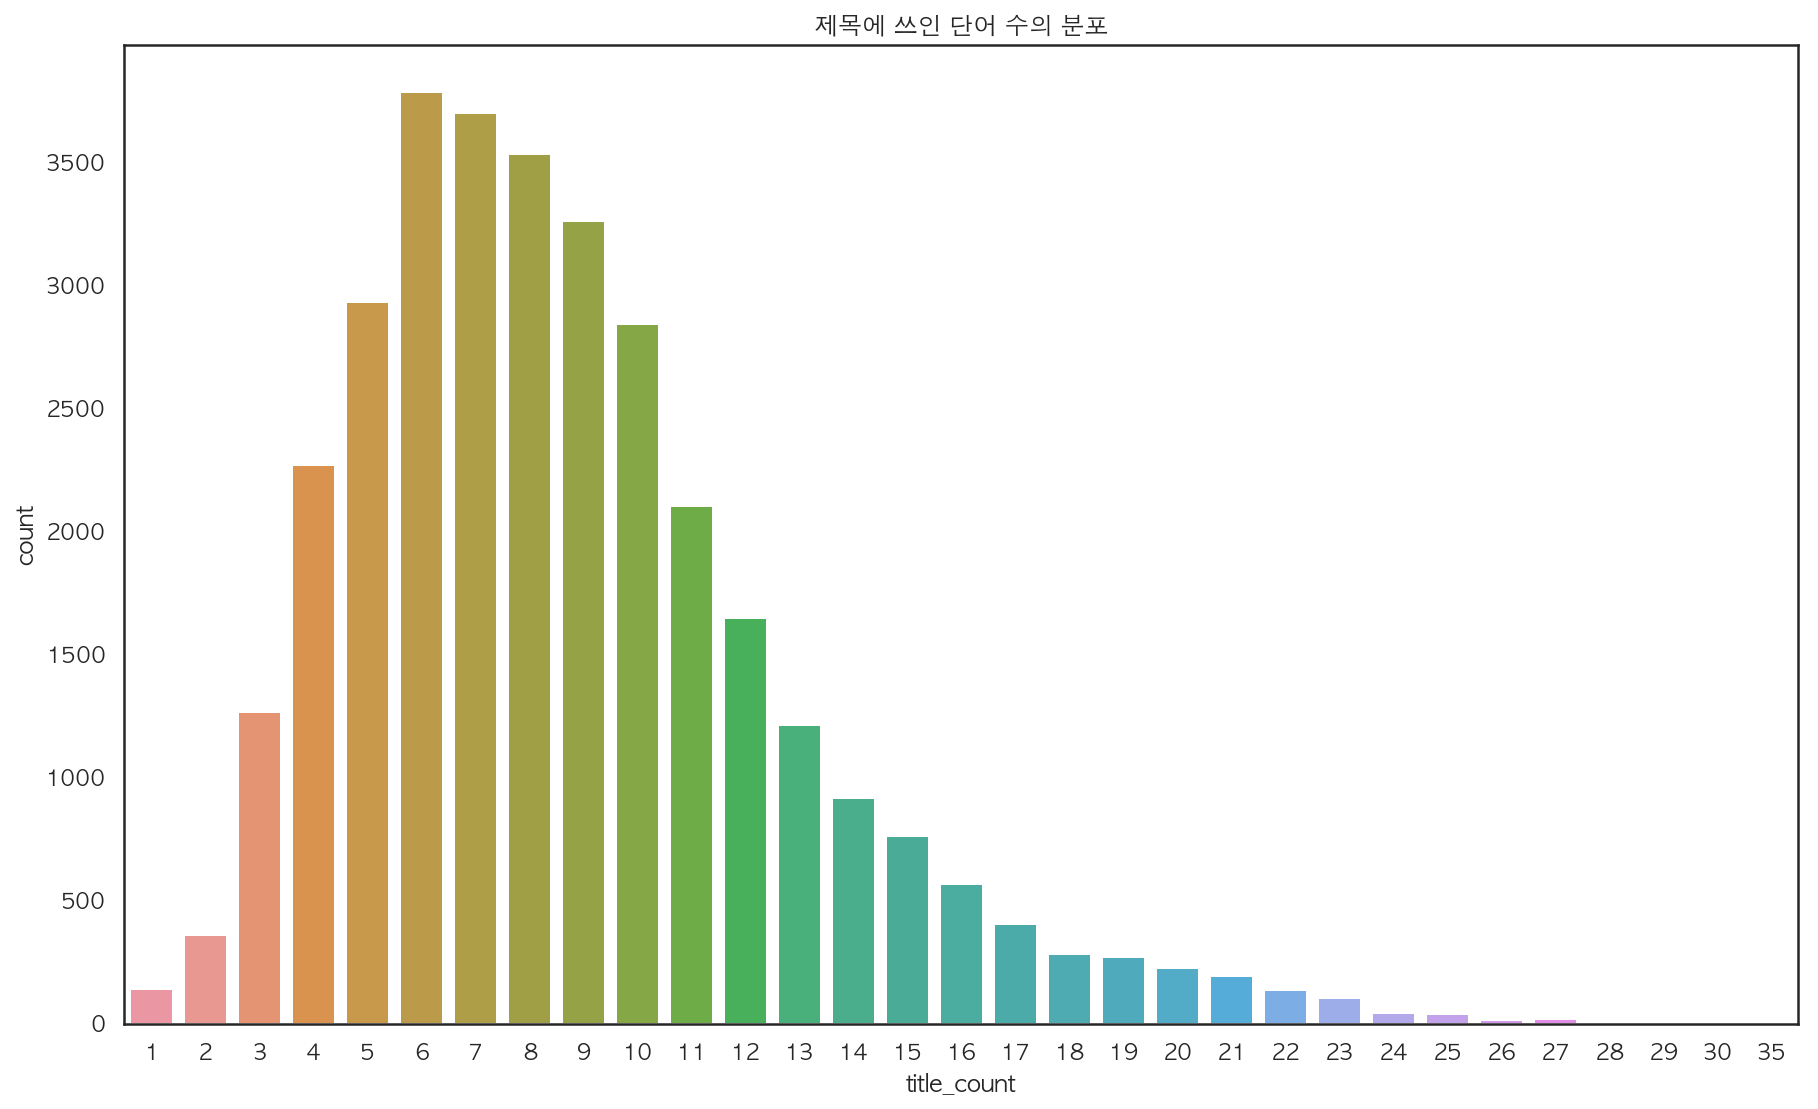

In [139]:
def getCount(s):
    s_ = s.split(" ")
    return len(s_)

df["title_count"] = df.title.apply(getCount)
plt.figure(figsize=(15, 9))
sns.countplot(df["title_count"])
plt.title("제목에 쓰인 단어 수의 분포")
plt.show()

제목에 쓰인 단어 수와 조회수 간의 관계가 존재하는가?

일단 그래프 먼저!

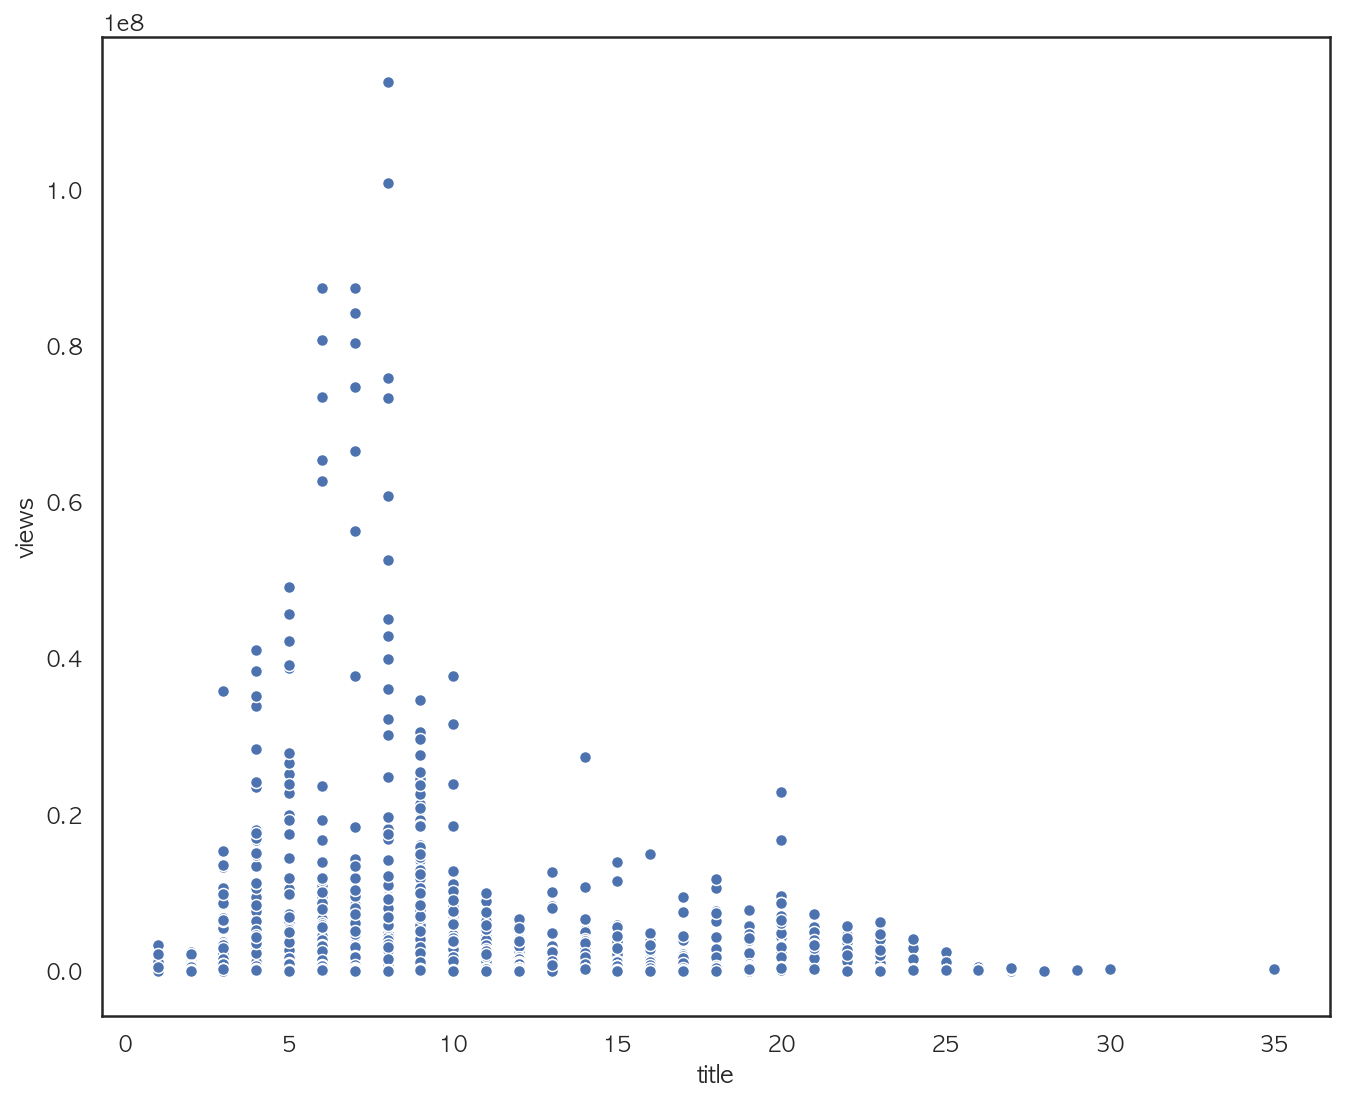

In [135]:
plt.figure(figsize=(11,9))
sns.scatterplot(x=df["title_count"], y=df.views)
plt.show()


이 때, 조회수는 1 ~ 35까지의 카테고리 데이터 또는 실수형 데이터로 취급 할 수 있겠지만, 1 ~ 35의 숫자에는 "순위"라는 것이 존재하기 때문에 범주형데이터와 같지 않고, 이산적인 분포이기 때문에 실수형 데이터와 같지 않다.

##### Kendall rank correlation coefficient 과 Spearman correlation

In [136]:
sp.stats.pearsonr(df["title_count"], df.views)

(-0.012697352923070664, 0.021032640426089093)

In [131]:
sp.stats.kendalltau(df["title_count"], df.views)

KendalltauResult(correlation=-0.021402004264424915, pvalue=1.8992686544631418e-08)

In [132]:
sp.stats.spearmanr(df["title_count"], df.views)

SpearmanrResult(correlation=-0.02977720731809981, pvalue=6.226265596935524e-08)

In [140]:
model = sm.OLS.from_formula(
    "views ~ C(title_count) - 1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.276
Date:                Sun, 19 May 2019   Prob (F-statistic):           8.36e-05
Time:                        23:44:49   Log-Likelihood:            -5.3234e+05
No. Observations:               33023   AIC:                         1.065e+06
Df Residuals:                   32992   BIC:                         1.065e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(title_count)[1]   2.983e+05   2.06

**Conclusion 3.**

위의 결과를 보아하니 제목은 3 ~ 9개의 단어로 짓는게 좋을 것 같다.

### 텍스트 분석

 - nltk
 - 워드 클라우드 
 - BoW

#### NLTK

NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다.

In [150]:
import nltk

In [151]:
# 전체 제목을 하나의 문서로
title_bank = ""

for title in df.title:
    title_bank += " " + title
    
title_bank[:100]

' 좋아 by 민서_윤종신_좋니 답가 JSA 귀순 북한군 총격 부상 나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼) 이명박 출국 현장, 놓치면 안되는 장면 김장겸은 물러갔다'

In [161]:
import stopwords

tokens = title_bank.split(" ")
useless = ["-", "", "|", "/", "]", "[", "]", "/", ":"]
tokens = [t for t in tokens if t not in stopwords.get_stopwords("ko") + useless]
title_text = nltk.Text(tokens, name="youtube titles")

#서로 다른 단어의 갯수
print(len(set(title_text)))
title_text.vocab()

62073


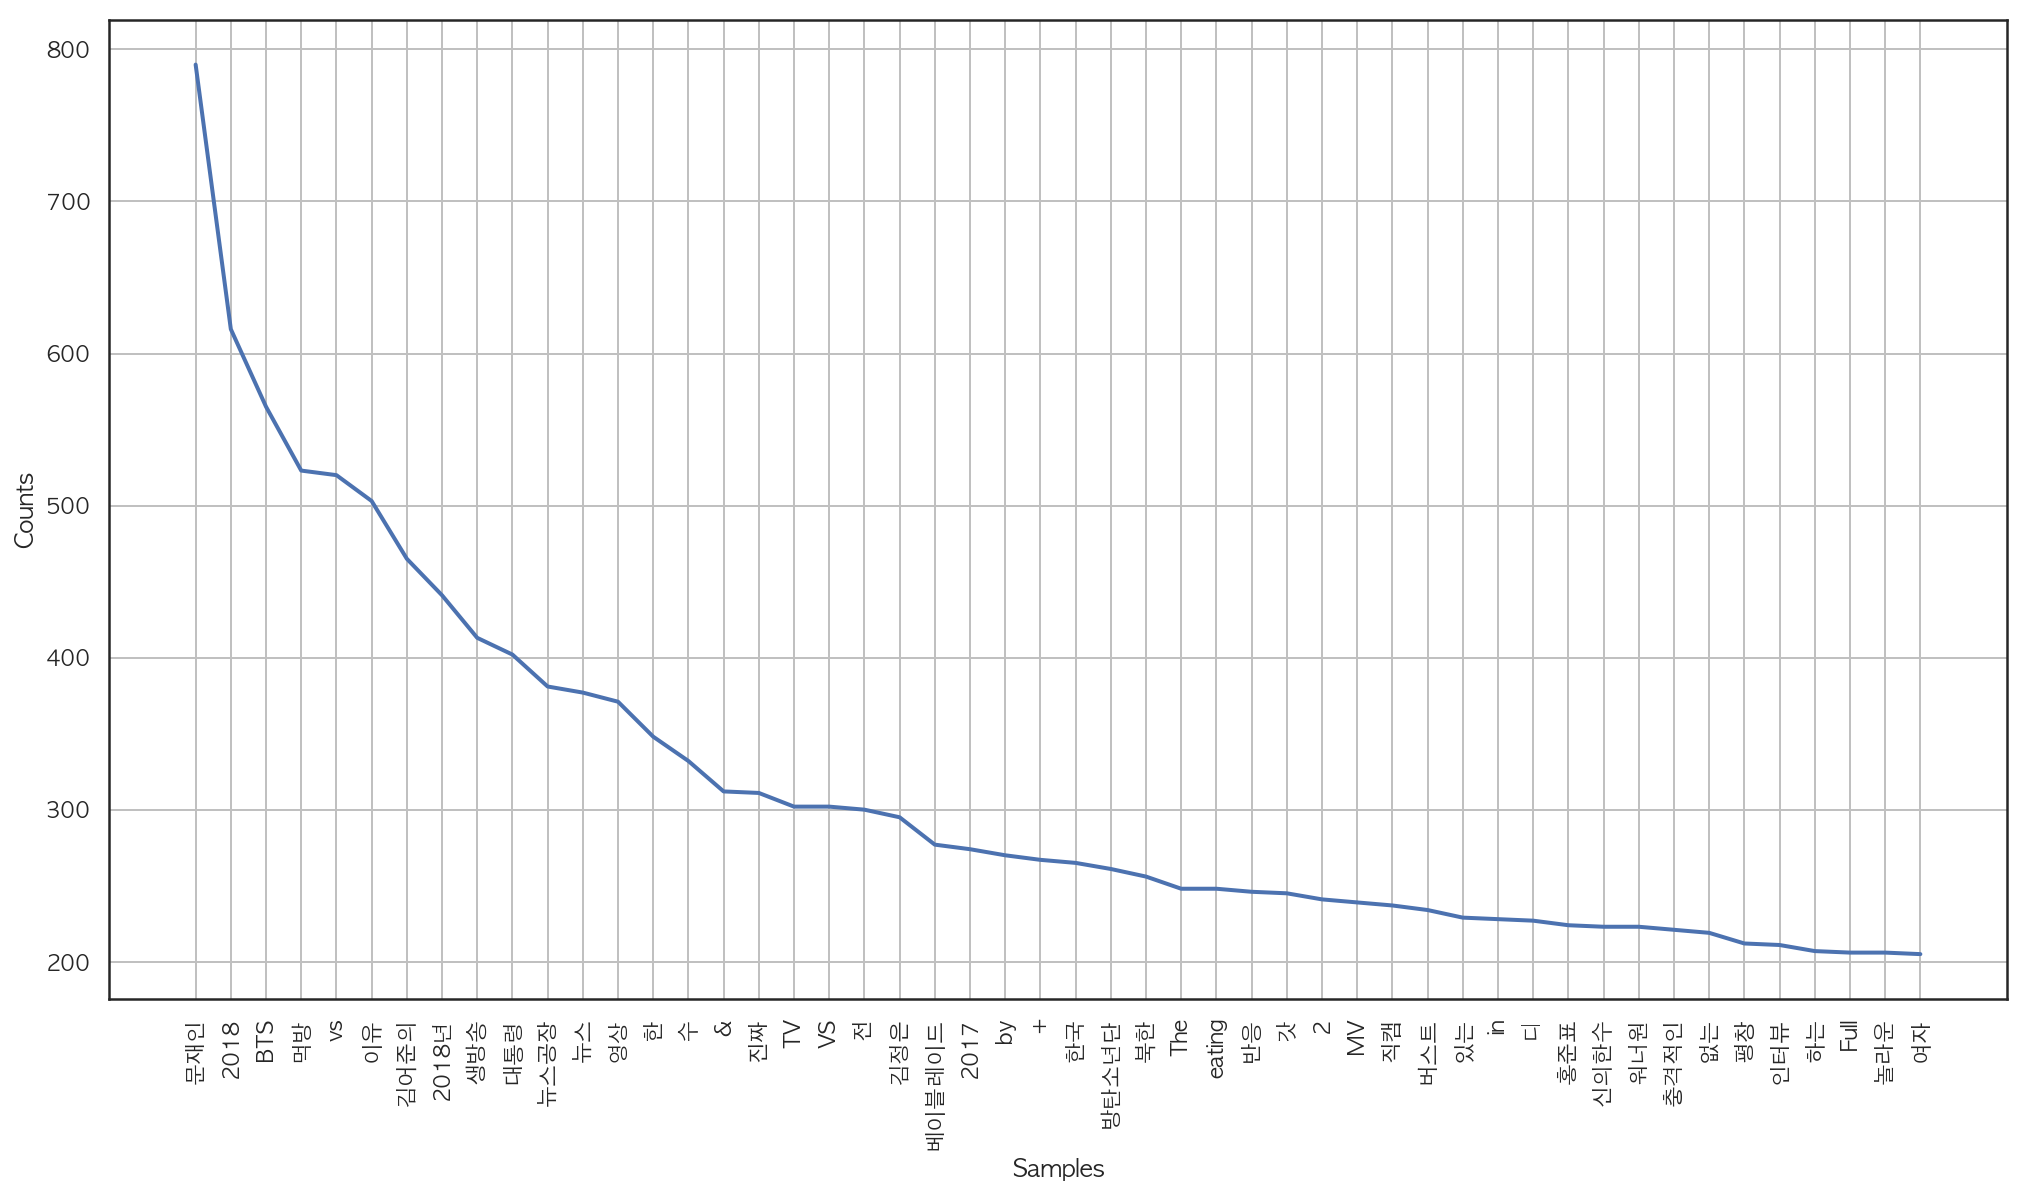

In [164]:
plt.figure(figsize=(17,9))
title_text.plot(50)
plt.show()

In [166]:
title_text.similar("BTS")

behind show on and at 반응 move drop live won reaction trailer mic takes
burn 좋은 world 웃음참기 release fake


In [170]:
title_text.collocations()

김어준의 뉴스공장; 베이블레이드 버스트; 신의한수 생방송; Deweni Inima; [변희재의 시사폭격]; BTS
(방탄소년단); Inima Episode; Tasty Guys]; [맛있는 녀석들; eating show; [법륜스님의
즉문즉설; 녀석들 Tasty; Wanna One; 문재인 대통령; 공대생 변승주; Mukbang eating; 묻어버린
'거짓의; 뉴스룸 다시보기; 대통령을 묻어버린; 생방송 PenN


#### 워드클라우드 

빈도나 중요도를 기준으로 글자의 크기를 결정하여 시각화하는 것으로 텍스트 시각화에서 가장 유명한 것. 

패키지 설치 : `pip install wordcloud`

In [171]:
from wordcloud import WordCloud

In [188]:
font_path = "/Library/Fonts/AppleGothic.ttf"
wc = WordCloud(max_words=2000, 
               font_path=font_path, 
               width=800, height=400,
               stopwords=stopwords.get_stopwords("ko") + useless
              , background_color="white").generate_from_text(title_bank)

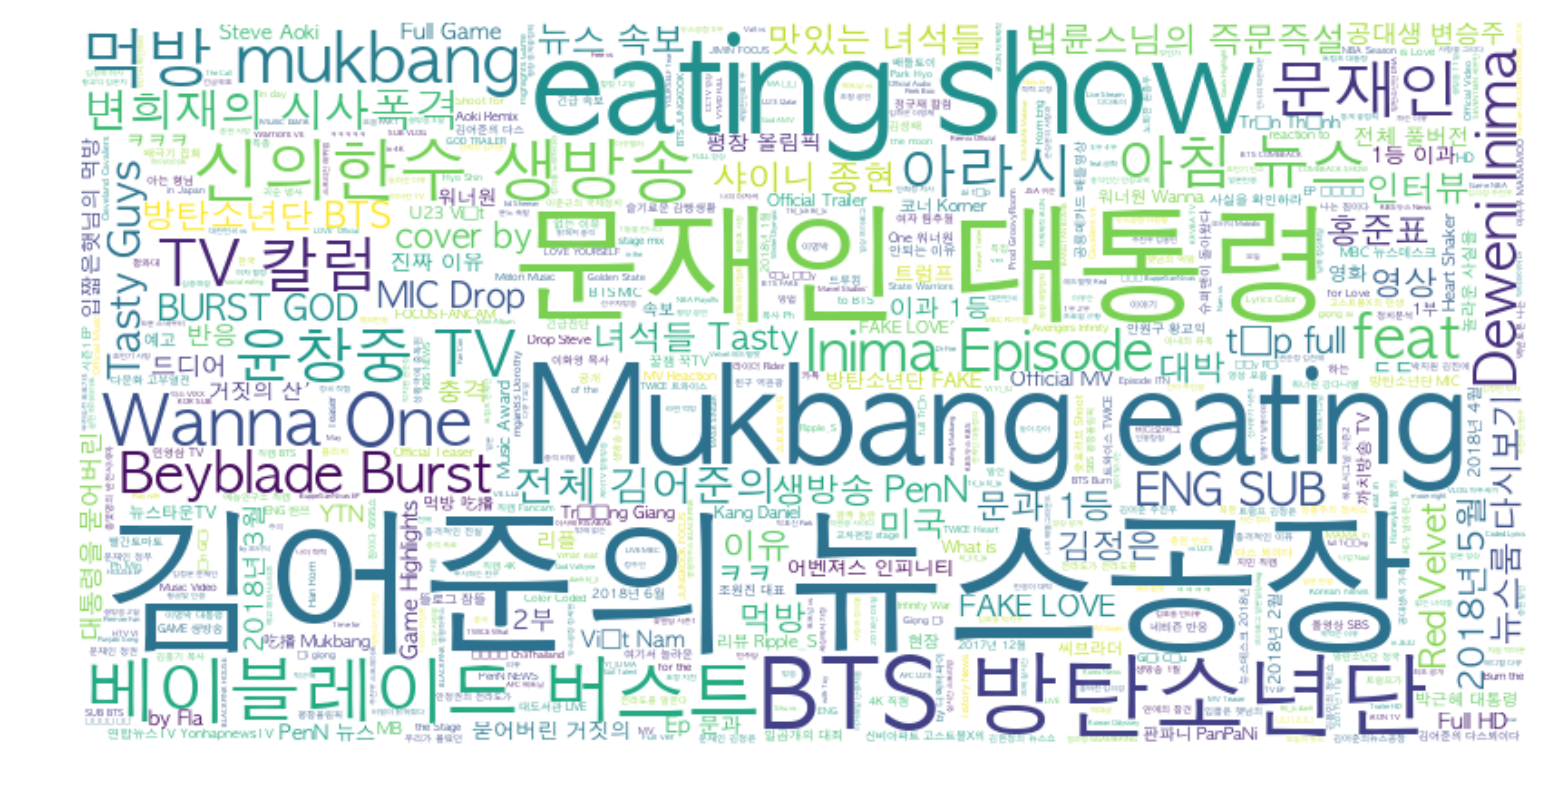

In [189]:
plt.figure(figsize=(13,13))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

텍스트를 컴퓨터에서 처리하기 위해서는 이를 숫자로 변환해야한다. 오늘은 그 중 가장 기초적이지만 가장 중요한 BoW(Bag of Words)방식에 대해서 공부한다. 

#### Bag of Words

: 간단하다. 단어장을 구성하고 해당 문서에 해당 단어가 나올 때마다 1씩 증가하는 것이다. 

ex>

문서 : 나는 오늘도 집에서 밥을 먹었다. 밥을 먹고나니 잠이 쏟아지네...

단어장 : {오늘, 집, 밥}

encoding : {1, 1, 2}

In [190]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,trending_lag,published_daytime,title_count
33018,pj6YBBrO1sQ,2018-06-14,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10 23:00:01,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,True,True,True,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,Entertainment,3,night,6
33019,_Ne9ER-jr20,2018-06-14,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12 07:00:06,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,True,True,True,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ...",Entertainment,1,day,5
33020,xuOQq_fzEjk,2018-06-14,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12 13:17:29,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,True,True,True,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...,News & Politics,1,night,5
33021,uXvjxeg08eQ,2018-06-14,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11 11:57:20,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,True,True,True,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...,People & Blogs,2,day,7
33022,C-bLqIftDY4,2018-06-14,[법륜스님의 즉문즉설 제 1398회] 시동생의 아이를 키우게 됐어요,법륜스님의 즉문즉설,29,2018-06-10 20:00:01,"불교|""즉문즉설""|""법륜스님""|""정토회""|""buddha""|""buddhism""|""po...",63716,500,58,135,https://i.ytimg.com/vi/C-bLqIftDY4/default.jpg,True,True,True,"3월에 시동생이 이혼했습니다 그러면서 제가중2, 7살, 4살 되는 조카들을 데리고 ...",Nonprofits & Activism,3,night,8
